## Installing Libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import imblearn
import time
from tqdm import tqdm
# Maths
import math
from numpy import mean , std
from collections import Counter

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [3]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN,NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [187]:
# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict,cross_val_score, RepeatedStratifiedKFold, StratifiedShuffleSplit

from   sklearn.linear_model import LogisticRegression, LinearRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.svm import SVC
from   sklearn.linear_model import SGDClassifier

from xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   sklearn.naive_bayes import GaussianNB
from   sklearn.neighbors import KNeighborsClassifier
#from   imblearn.over_sampling import RandomOverSampler
import pickle

#Clasturing 
from sklearn.cluster import KMeans

# Evalution
from   sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve, auc, f1_score
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score

#plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead

In [5]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

# Random State
RANDOM_STATE = 605039 # my loving number

# Data input

In [6]:
df = pd.read_csv("modified_BA_flight_data_15092024.csv", index_col='Unnamed: 0')

In [7]:
#sns.pairplot(data=df, hue= 'booking_complete' )
#plt.show()

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52,0


# Target variable 

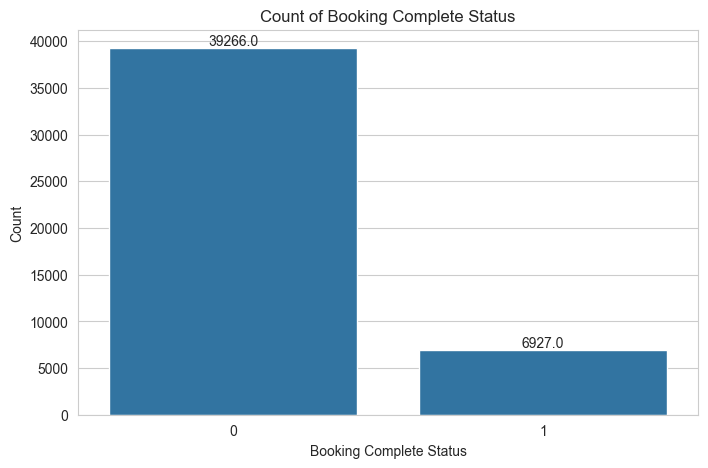

In [9]:
plt.figure(figsize=(8,5))
f = sns.countplot( data = df,x= 'booking_complete')
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Booking Complete Status")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Count of Booking Complete Status")  # Title reflecting the actual plot
plt.show()

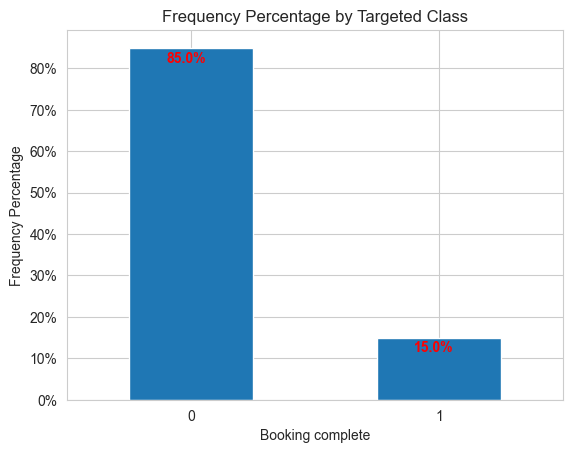

In [10]:
ax = (df['booking_complete'].value_counts() /len(df)*100).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Frequency Percentage')
ax.set_xlabel('Booking complete')
ax.set_title('Frequency Percentage by Targeted Class')
totals = []  # list to collect the plt.patches data
# values and append to list
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)  # setting individual bar lables using above list
for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
  str(round((i.get_height()/total), 1))+'%', color='red', weight = 'bold')
plt.grid(True)
plt.show()

# 

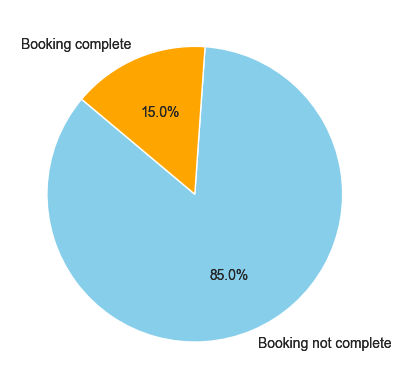

In [241]:
labels=["Booking not complete","Booking complete"]

complete_or_not = df['booking_complete'].value_counts().tolist()
values = [complete_or_not[0],complete_or_not[1]]

fig = plt.pie(x=  df['booking_complete'].value_counts(), labels=labels, startangle=140, autopct='%1.1f%%', colors=["skyblue","orange"], pctdistance=0.6, labeldistance=1.1, radius=1.0)

#fig = plt.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
#plt.title("Fraud vs Genuine transactions")
plt.show()

To deal with the problem of imbalanced data need resampling the data.
Over-Sampling:
In this technique, the minority classes are randomly duplicated in order to match the number of majority classes.

 - The Precision-Recall curve is particularly useful in evaluating models for imbalanced datasets.
- It’s important to note that when resampling the training data, we should never evaluate the model on the resampled data, as it can lead to overfitting to the resampled distribution.


# Define the target 

In [12]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


In [13]:
# Define the target 
X= df.drop('booking_complete', axis=1)
Y= df['booking_complete']

In [14]:
X.shape

(46193, 13)

In [15]:
Y.shape

(46193,)

In [16]:
type(Y)

pandas.core.series.Series

# Workflow

**Workflow with Stratified Splitting**

Step 1: Use stratified train-test split to maintain class proportions

step 2: Encode categorical variables (e.g., One-Hot Encoding, Label Encoding).

Step 3: Check the class distribution in the training set (proportions will be preserved)

Step 4: Apply  oversampling/Under Sampling  only to the training set

Step 5: Scale the data using a technique like StandardScaler or MinMaxScaler.

Step 6: Check the new class distribution after oversampling

Step 7: Train the model on the resampled training set

Step 8: Evaluate the model on the original test set


# Data spliting

In imbalanced datasets, oversampling or undersampling should be performed to balace the sample only on the training set after splitting the data, not on the entire dataset. 

In [17]:
#split_test_val = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state= 39)

In [18]:
#split_test_val.split(X,Y)

In [19]:
# Check if X and Y are pandas DataFrames
#print(type(X), type(Y))

In [20]:
# Using Stratifeid sampling
#stratified splitting, typically stratify based on the target variable 
#70% (train), 15% (validation), and 15% (test)

# 1st split to train and test with validation


split_test = StratifiedShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
for train_index , test_val_index in split_test.split(X,Y):
    X_train, X_test_val = X.iloc[train_index], X.iloc[test_val_index]
    Y_train, Y_test_val = Y.iloc[train_index], Y.iloc[test_val_index]
    


In [21]:
# 2nd split to test set to test and validation set
split_val = StratifiedShuffleSplit(n_splits=1, train_size=0.5, random_state=42)
for test_index , val_index in split_val.split(X_test_val,Y_test_val):
    X_test, X_val = X_test_val.iloc[test_index], X_test_val.iloc[val_index]
    Y_test, Y_val = Y_test_val.iloc[test_index], Y_test_val.iloc[val_index]

In [22]:
Y_test.shape

(6929,)

In [23]:
X_test.shape

(6929, 13)

In [24]:
X_train.shape

(32335, 13)

In [25]:
Y_train.shape

(32335,)

In [26]:
X_val.shape

(6929, 13)

In [27]:
Y_val.shape

(6929,)

# Feature Engineering

In [28]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


## Catagorical encoding

In [29]:
print(df['sales_channel'].unique())
print(df['trip_type'].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']


### OneHot Encoding 

In [30]:
# OneHotEncoder for 'sales_channel' and 'trip_type'
def cat_onehot(train,test,val,column):
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False for dense matrix ; drop='first' to avoid dummy variable trap
    
    # Fit and transform the column
    train_encoded = encoder.fit_transform(train[[column]])
    # transform the test column
    test_encoded = encoder.transform(test[[column]])
    val_encoded = encoder.transform(val[[column]])
    # Create a DataFrame with the encoded values and new column names ## Get feature names from the encoder
    train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out([column]))
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out([column]))
    val_encoded_df = pd.DataFrame(val_encoded, columns=encoder.get_feature_names_out([column]))
    
    # Reset index to match the original data's index
    train_encoded_df.index = train.index
    test_encoded_df.index = test.index
    val_encoded_df.index = val.index
    
    # new column put into main dataset
    train_ = pd.concat([train,train_encoded_df], axis=1)
    test_ = pd.concat([test,test_encoded_df], axis=1)
    val_ = pd.concat([val,val_encoded_df], axis=1)
    # Return the DataFrame with OneHotEncoded columns
    return train_ , test_, val_

In [31]:
# need validation set encoding

In [32]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'sales_channel')


In [33]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'trip_type')
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
34225,2,Internet,RoundTrip,21,4,15,7,PENPUS,South Korea,0,0,0,6.33,0.0,0.0,1.0
33996,1,Internet,RoundTrip,60,4,4,2,others,China,0,0,0,8.83,0.0,0.0,1.0
38528,1,Internet,RoundTrip,160,5,12,3,HKTSYD,Australia,0,0,1,8.58,0.0,0.0,1.0
49914,2,Internet,RoundTrip,206,6,12,6,PENTPE,Malaysia,0,0,0,4.67,0.0,0.0,1.0
44587,3,Internet,RoundTrip,401,6,13,7,DMKKIX,Thailand,1,0,0,7.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,1,Internet,RoundTrip,2,2,1,1,others,Malaysia,0,1,0,6.42,0.0,0.0,1.0
32522,1,Mobile,RoundTrip,1,4,16,4,ICNJHB,Singapore,1,0,0,6.62,1.0,0.0,1.0
28046,1,Internet,RoundTrip,9,3,4,2,ICNPEN,Japan,1,0,1,6.62,0.0,0.0,1.0
46064,1,Internet,RoundTrip,97,6,2,4,HKGMEL,Australia,1,0,0,8.83,0.0,0.0,1.0


In [34]:
X_test.shape

(6929, 16)

In [35]:
X_val 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
8206,1,Internet,RoundTrip,88,28,10,3,DELMEL,Australia,0,0,0,8.83,0.0,0.0,1.0
44576,1,Internet,RoundTrip,58,6,14,2,DMKKIX,Thailand,1,1,1,7.00,0.0,0.0,1.0
16160,1,Internet,RoundTrip,10,41,4,6,others,Australia,1,1,1,8.83,0.0,0.0,1.0
20992,2,Internet,RoundTrip,3,19,0,4,others,Australia,1,0,1,8.83,0.0,0.0,1.0
6857,1,Mobile,RoundTrip,50,20,7,1,COKSYD,Australia,1,1,1,8.58,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,Internet,RoundTrip,22,33,6,2,others,Australia,0,0,0,8.83,0.0,0.0,1.0
8433,1,Internet,RoundTrip,82,23,11,7,others,Philippines,1,1,1,5.52,0.0,0.0,1.0
453,1,Internet,RoundTrip,119,21,22,7,AKLKUL,Malaysia,0,1,0,8.83,0.0,0.0,1.0
7551,1,Internet,RoundTrip,99,39,11,5,others,Australia,1,1,1,8.83,0.0,0.0,1.0


 Catagorical encoding of High-cardinality categorical variables with many unique categories and large datasets

In [36]:
X_train['route'].nunique()

124

### Frequency encoding

In [37]:

#Frequency encoding is simple and captures how often each category appears in the dataset, which can sometimes correlate with the target in tree-based models.
# Function for frequency encoding with handling for unseen categories
def frequency_encoding(train, test,val, column):
    # Calculate the frequency of each unique value in the 'route' column from the training set
    freq_encoding = train[column].value_counts().to_dict()
    
    # Map the frequencies to the train and test sets
    train[f'{column}_encoded'] = train[column].map(freq_encoding)
    test[f'{column}_encoded'] = test[column].map(freq_encoding)
    val[f'{column}_encoded'] = val[column].map(freq_encoding)
    
    # Handle unseen categories in test set (NaN values) by assigning 0 or a custom value
    test[f'{column}_encoded'].fillna(0, inplace=True)  # Alternatively, you can use train[column].mean() for a more robust fill value.
    val[f'{column}_encoded'].fillna(0, inplace=True)
    
    return train, test, val



In [38]:
# Apply frequency encoding function to X_train and X_test
X_train_encoded, X_test_encoded, X_val_encoded = frequency_encoding(X_train, X_test,X_val,'route')

# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'route_encoded'
print(X_train_encoded[['route', 'route_encoded']].head())


        route  route_encoded
34225  PENPUS             71
33996  others           9877
38528  HKTSYD            258
49914  PENTPE            612
44587  DMKKIX            493


In [39]:
X_val_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded
8206,1,Internet,RoundTrip,88,28,10,3,DELMEL,Australia,0,0,0,8.83,0.0,0.0,1.0,161
44576,1,Internet,RoundTrip,58,6,14,2,DMKKIX,Thailand,1,1,1,7.00,0.0,0.0,1.0,493
16160,1,Internet,RoundTrip,10,41,4,6,others,Australia,1,1,1,8.83,0.0,0.0,1.0,9877
20992,2,Internet,RoundTrip,3,19,0,4,others,Australia,1,0,1,8.83,0.0,0.0,1.0,9877
6857,1,Mobile,RoundTrip,50,20,7,1,COKSYD,Australia,1,1,1,8.58,1.0,0.0,1.0,315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,Internet,RoundTrip,22,33,6,2,others,Australia,0,0,0,8.83,0.0,0.0,1.0,9877
8433,1,Internet,RoundTrip,82,23,11,7,others,Philippines,1,1,1,5.52,0.0,0.0,1.0,9877
453,1,Internet,RoundTrip,119,21,22,7,AKLKUL,Malaysia,0,1,0,8.83,0.0,0.0,1.0,1632
7551,1,Internet,RoundTrip,99,39,11,5,others,Australia,1,1,1,8.83,0.0,0.0,1.0,9877


In [40]:
X_test_encoded[ X_test_encoded['route_encoded'] == 0]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded


### Target Encoding

In [41]:
X_train['booking_origin'].nunique()

27

In [42]:
# Target Encoding is the best option for tree-based models when you have a moderate number of categories (like 27). 
# It captures the relationship between the categories and the target variable.

def target_encoding(train, test, val, Y_train, column):
    # Initialize the target encoder
    target_encoder = ce.TargetEncoder(cols=column)

    # Fit the encoder on the training set (using the target variable Y_train)
    train[f'{column}_encoded']  = target_encoder.fit_transform(train[column], Y_train)

    # Apply the encoding to the test set
    test[f'{column}_encoded']  = target_encoder.transform(test[column])
    
    # Apply the encoding to the validetion set
    val[f'{column}_encoded']  = target_encoder.transform(val[column])
    
    return train, test, val

In [43]:
# Apply Target Encoding function to X_train and X_test
# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'booking_origin'

X_train, X_test, X_val = target_encoding(X_train, X_test,X_val, Y_train,'booking_origin')

print(X_train[['booking_origin', 'booking_origin_encoded']].head())

      booking_origin  booking_origin_encoded
34225    South Korea                0.104502
33996          China                0.203850
38528      Australia                0.047149
49914       Malaysia                0.354983
44587       Thailand                0.237415


In [44]:
print(X_val[['booking_origin', 'booking_origin_encoded']] )

      booking_origin  booking_origin_encoded
8206       Australia                0.047149
44576       Thailand                0.237415
16160      Australia                0.047149
20992      Australia                0.047149
6857       Australia                0.047149
...              ...                     ...
22033      Australia                0.047149
8433     Philippines                0.259258
453         Malaysia                0.354983
7551       Australia                0.047149
35475       Malaysia                0.354983

[6929 rows x 2 columns]


In [45]:
X_train.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded'],
      dtype='object')

In [46]:
X_train.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
34225,2,21,4,15,7,0,0,0,6.33,0.0,0.0,1.0,71,0.104502
33996,1,60,4,4,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.203850
38528,1,160,5,12,3,0,0,1,8.58,0.0,0.0,1.0,258,0.047149
49914,2,206,6,12,6,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
44587,3,401,6,13,7,1,0,0,7.00,0.0,0.0,1.0,493,0.237415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,1,2,2,1,1,0,1,0,6.42,0.0,0.0,1.0,9877,0.354983
32522,1,1,4,16,4,1,0,0,6.62,1.0,0.0,1.0,99,0.280347
28046,1,9,3,4,2,1,0,1,6.62,0.0,0.0,1.0,193,0.123330
46064,1,97,6,2,4,1,0,0,8.83,0.0,0.0,1.0,64,0.047149


In [47]:
X_test.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
38811,2,44,5,0,2,1,1,1,7.57,0.0,0.0,1.0,281,0.123330
33961,1,32,4,13,2,0,1,0,5.62,0.0,0.0,1.0,63,0.259258
21513,1,60,26,7,7,1,0,0,8.83,0.0,0.0,1.0,118,0.047149
4655,1,124,29,6,4,1,0,0,8.83,0.0,0.0,1.0,312,0.047149
10154,1,99,25,16,1,1,1,0,8.58,0.0,0.0,1.0,347,0.237415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,1,51,33,10,1,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
44980,1,6,6,3,4,0,0,0,8.58,0.0,0.0,1.0,347,0.237415
32264,1,51,4,22,5,0,1,0,7.57,1.0,0.0,1.0,281,0.123330
27105,2,66,3,11,1,1,0,0,6.62,0.0,0.0,1.0,198,0.237415


In [48]:
X_val.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_val

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
8206,1,88,28,10,3,0,0,0,8.83,0.0,0.0,1.0,161,0.047149
44576,1,58,6,14,2,1,1,1,7.00,0.0,0.0,1.0,493,0.237415
16160,1,10,41,4,6,1,1,1,8.83,0.0,0.0,1.0,9877,0.047149
20992,2,3,19,0,4,1,0,1,8.83,0.0,0.0,1.0,9877,0.047149
6857,1,50,20,7,1,1,1,1,8.58,1.0,0.0,1.0,315,0.047149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,22,33,6,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.047149
8433,1,82,23,11,7,1,1,1,5.52,0.0,0.0,1.0,9877,0.259258
453,1,119,21,22,7,0,1,0,8.83,0.0,0.0,1.0,1632,0.354983
7551,1,99,39,11,5,1,1,1,8.83,0.0,0.0,1.0,9877,0.047149


# Resampling Techniques for Balancing

In [49]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [50]:
# Resampling techniques used 
TECHNIQUE_NAME =[ 'overRandomsampling','SMOTE','ADASYN',' underRandomsampling','allknn','NeighbourhoodCleaningRule','Tomek Links']

In [51]:
# function for ploting class balance 
def plot_target_balance(y, TECHNIQUE_NAME):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (7, 5))
    sns.countplot(x = df['booking_complete'], ax = ax1)
    ax1.set_title("Original Target");
    pd.Series(df['booking_complete']).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                                     textprops = {'fontsize' : 10}, ax = ax2 ) 
    
    ax2.set_title("Original distribution");                                                #title = 'Original distribution')
    sns.countplot(x = y, ax = ax3)
    ax3.set_title(f"{TECHNIQUE_NAME} Target");
    pd.Series(y).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                         textprops = {'fontsize' : 10}, ax = ax4 )
                                        # title = f"{TECHNIQUE_NAME} distribution")
    ax4.set_title(f"{TECHNIQUE_NAME} distribution")
    ax1.grid(False)
    ax3.grid(False)
    plt.tight_layout()
    plt.show()
    
def plot_scatter(X, y, TECHNIQUE_NAME):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = False, figsize = (10, 4))
    sns.scatterplot(data = df, x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete', ax = ax1)
    ax1.set_title("Original distribution")
    sns.scatterplot(data = pd.concat([X,y], axis = 1),
                     x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete',)
    ax1.grid(False)
    ax2.grid(False)
    ax2.set_title(f"{TECHNIQUE_NAME} distribution")
    plt.show()

## Over Sampling

In [52]:
# Check the class distribution in the training set (proportions will be preserved)
print("Original class distribution:", Counter(Y_train))

Original class distribution: Counter({0: 27486, 1: 4849})


In [53]:
# Apply  oversampling Sampling to the training set
# from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, Y_train)

In [54]:
# Check the new class distribution after oversampling
print("Ouer Resampled class distribution:", Counter(y_over))

Ouer Resampled class distribution: Counter({0: 27486, 1: 27486})


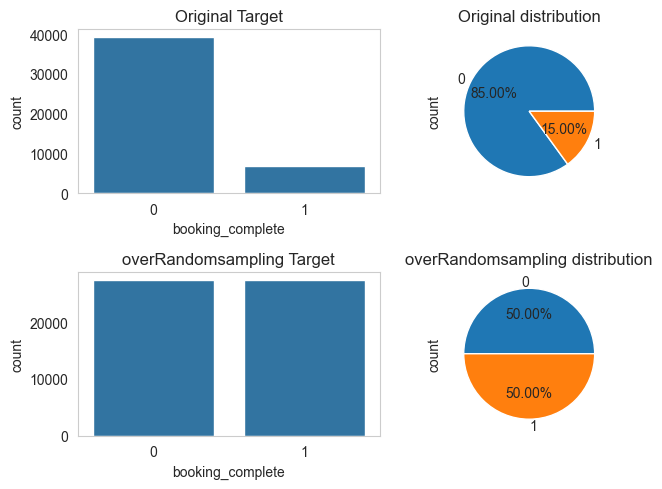

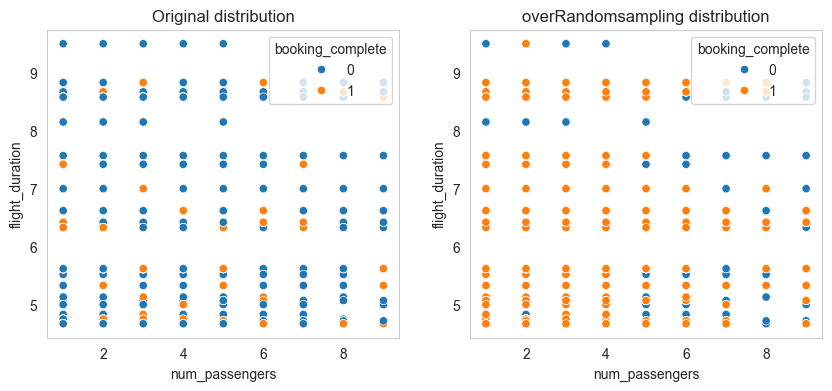

In [55]:
# Visualization of resampling effect
plot_target_balance(y_over, TECHNIQUE_NAME[0])
plot_scatter(X_over, y_over, TECHNIQUE_NAME[0])


## Oversampling: SMOTE

Generating Synthetic Samples: (SMOTE)
SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies.

In [56]:
#from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123)
X_train_sm,Y_train_sm = sm.fit_resample(X_train, Y_train.ravel())

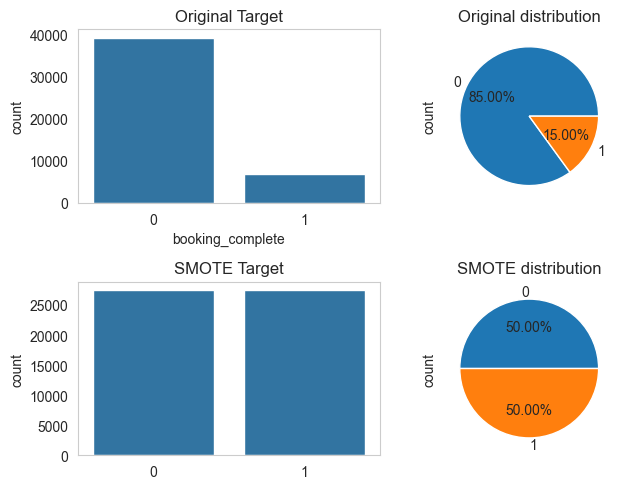

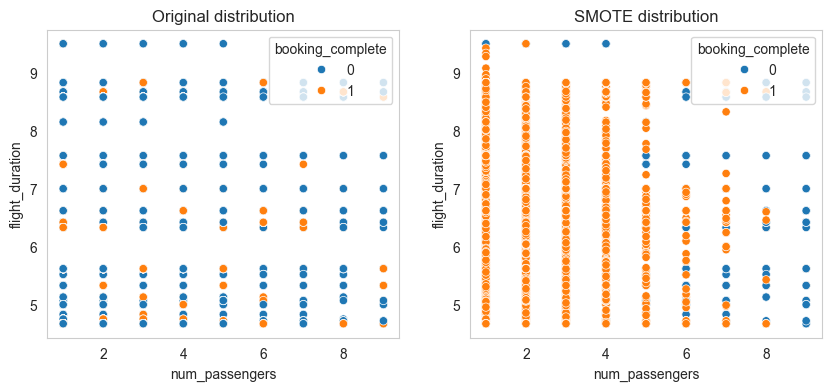

In [57]:
# Visualization of resampling effect
plot_target_balance(Y_train_sm,TECHNIQUE_NAME[1])
# Y_train_res is numpy.ndarray
Y_train_res_df = pd.DataFrame(Y_train_sm, columns=['booking_complete'])
plot_scatter(X_train_sm, Y_train_res_df,TECHNIQUE_NAME[1])

## Oversampling: ADASYN

In [58]:
ada = ADASYN(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = 4)

X_ada, y_ada = ada.fit_resample(X_train,Y_train)

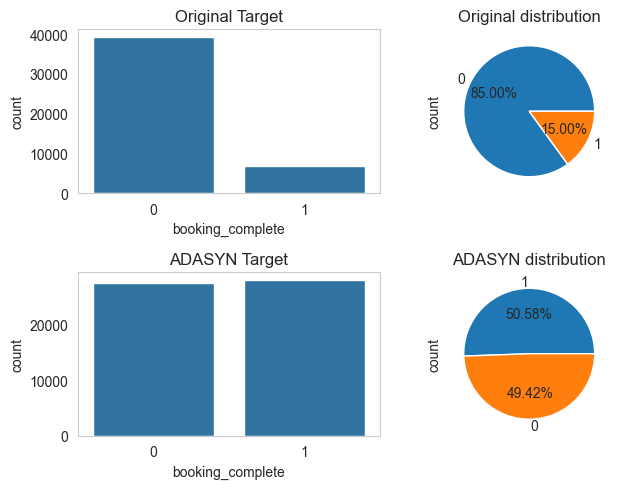

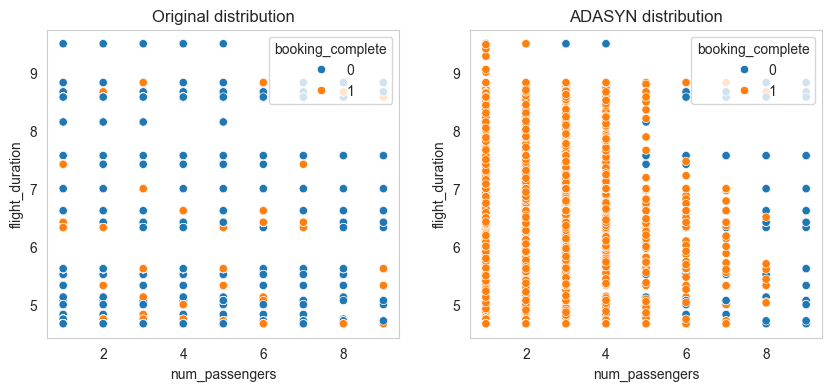

In [59]:
# Visualization of resampling effect
plot_target_balance(y_ada,TECHNIQUE_NAME[2])
# Y_train_res is numpy.ndarray
#Y_train_res_df = pd.DataFrame(Y_train_res, columns=['booking_complete'])
plot_scatter(X_ada, y_ada, TECHNIQUE_NAME[2])

## Under Sampling

Under-Sampling:
In this technique, The majority class are down sampled to the size of minority class by randomly deleting data points from the majority class.

In [60]:
#from imblearn.over_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto')

X_under, y_under = undersample.fit_resample(X_train, Y_train)

# Check the new class distribution after oversampling
print("Under Resampled class distribution:", Counter(y_under))

Under Resampled class distribution: Counter({0: 4849, 1: 4849})


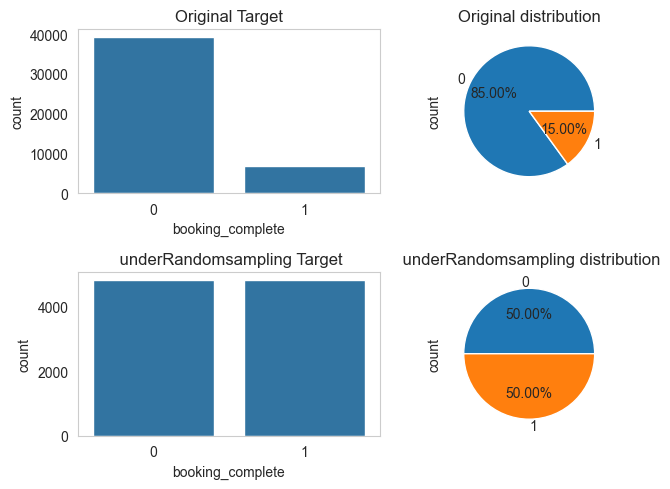

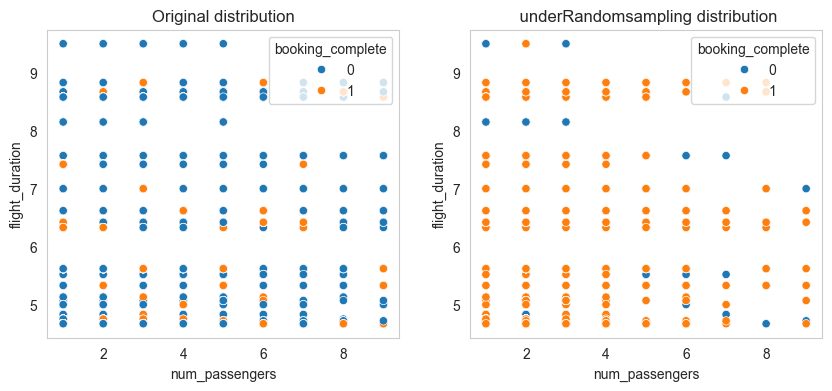

In [61]:
# Visualization of resampling effect
plot_target_balance(y_under, TECHNIQUE_NAME[3])
plot_scatter(X_under, y_under , TECHNIQUE_NAME[3])

## Undersampling: All KNN

All KNN (All k-Nearest Neighbors) is a form of instance selection that involves considering the entire dataset and its nearest neighbors to identify and remove noisy or misclassified instances, thereby enhancing the quality of the training set.

In [62]:


allknn = AllKNN(sampling_strategy = 'auto', kind_sel = 'all',
                n_jobs = -1)

X_allknn , y_allknn  = allknn.fit_resample(X_train, Y_train)

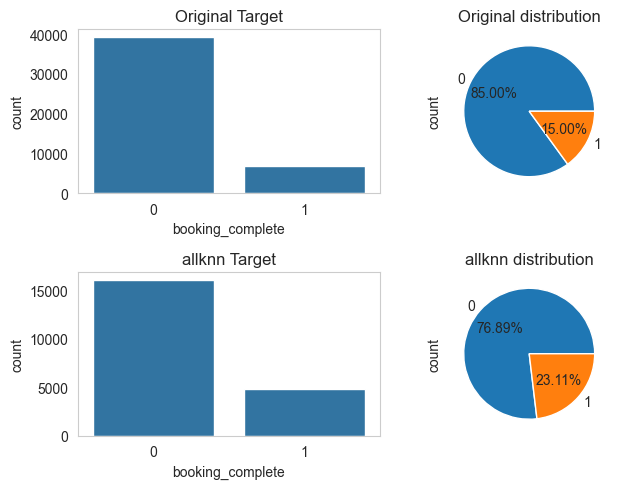

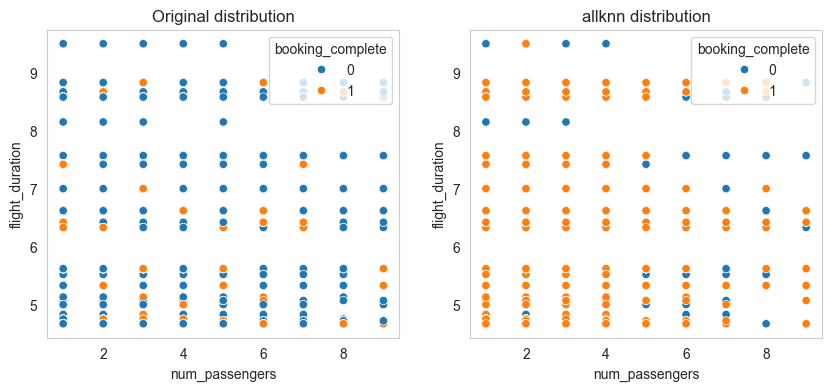

In [63]:
# Visualization of resampling effect
plot_target_balance(y_allknn, TECHNIQUE_NAME[4])
plot_scatter(X_allknn , y_allknn  , TECHNIQUE_NAME[4])

## Undersampling: Neighbourhood Cleaning Rule

NCL is an instance selection method that aims to identify and remove instances that are considered noisy or ambiguous from the dataset, particularly focusing on those instances near class boundaries

In [64]:
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto', kind_sel = 'all',
                                n_jobs = -1) 

X_ncr, y_ncr = ncr.fit_resample(X_train, Y_train)

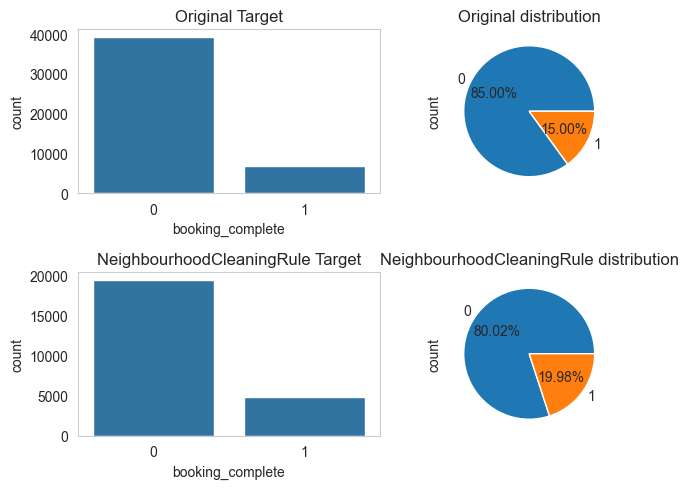

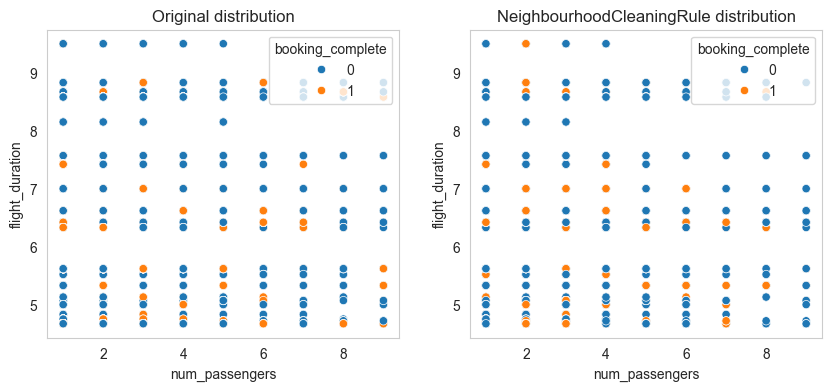

In [65]:
# Visualization of resampling effect
plot_target_balance(y_ncr, TECHNIQUE_NAME[5])
plot_scatter(X_ncr, y_ncr, TECHNIQUE_NAME[5])

In [66]:
X_ncr

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
0,1,60,4,4,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.203850
1,1,160,5,12,3,0,0,1,8.58,0.0,0.0,1.0,258,0.047149
2,2,206,6,12,6,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
3,3,401,6,13,7,1,0,0,7.00,0.0,0.0,1.0,493,0.237415
4,1,79,5,22,7,1,0,1,6.62,0.0,0.0,1.0,150,0.354983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24267,2,202,4,5,5,1,0,0,4.67,0.0,0.0,1.0,612,0.354983
24268,3,222,20,2,1,1,0,1,8.58,0.0,0.0,1.0,127,0.047149
24269,1,2,2,1,1,0,1,0,6.42,0.0,0.0,1.0,9877,0.354983
24270,1,1,4,16,4,1,0,0,6.62,1.0,0.0,1.0,99,0.280347


## Undersampling: Tomek Links

In [67]:
tl = TomekLinks(sampling_strategy = 'auto', n_jobs = -1)  

X_tl, y_tl = tl.fit_resample(X_train, Y_train)

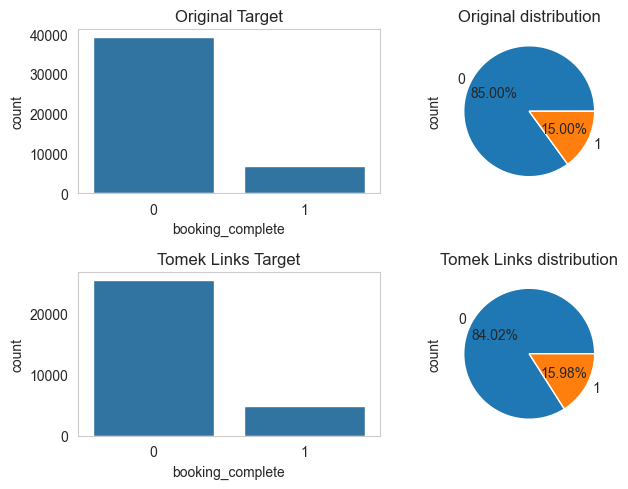

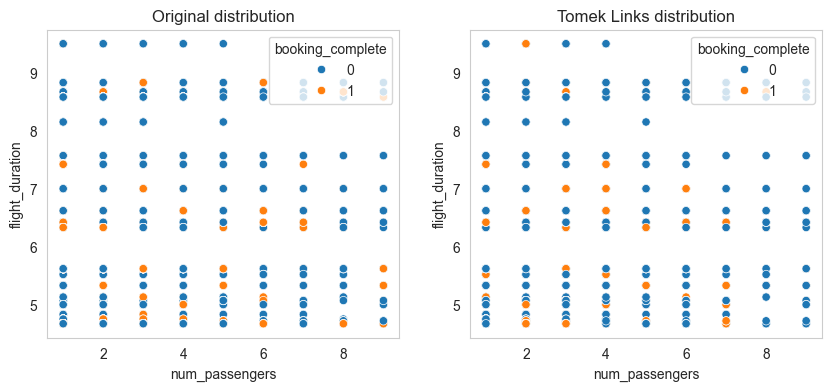

In [68]:
# Visualization of resampling effect
plot_target_balance(y_tl, TECHNIQUE_NAME[6])
plot_scatter(X_tl, y_tl, TECHNIQUE_NAME[6])

# Model

Choose the ML algorithm from 

1. LogisiticRegression
2. DecisionTreeClassifier
3. XGBClassifier
4. LGBMClassifier
5. Support vector Machine
6. Random Forest
7. Support Vector 
8. Naive Bayes
9. Stochastic gradient descent

In [69]:
# Holding arrays
Technique = list()
Type = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()
CV_score = list()
Algo= list()

In [70]:
# filter the numerical feature
numeric_features_ = numeric_features.drop('booking_complete')
# Isolated dataset with only numeric coluymns 
X_train_n = X_train[numeric_features_]
X_test_n = X_test[numeric_features_]
X_val_n = X_val[numeric_features_]

categoricals=['sales_channel_Mobile','trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded']

## Scalling

- One-hot encoded data: No scaling is needed.
- Numerically encoded categorical data: Apply scaling (e.g., StandardScaler or MinMaxScaler) If use a distance-based or linear model.
- If use a tree-based algorithm, scaling is not necessary.

In [73]:
# Scaling function
def scale_data(X_train, X_test, X_val):
    # Using standard scaling
    # Initialize the scaler
    scaler = StandardScaler()
    # Fit the scaler on the training set
    scaler.fit( X_train[numeric_features_])

    # Transform the test and validation sets using the same scaler
    X_train_scaled= scaler.transform( X_train[numeric_features_])
    X_test_scaled = scaler.transform( X_test[numeric_features_])
    X_val_scaled = scaler.transform( X_val[numeric_features_] )
    
    # Convert the scaled arrays back to DataFrames with original column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_n.columns, index=  X_train[numeric_features_].index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_n.columns, index=  X_test[numeric_features_].index)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns= X_val_n.columns, index= X_val[numeric_features_].index)
    
    # Concat numerical and categorical data
    X_train_ = pd.concat([X_train_scaled,X_train[categoricals]], axis=1)
    X_test_ = pd.concat([X_test_scaled,X_test[categoricals]], axis=1)
    X_val_ = pd.concat([X_val_scaled,X_val[categoricals]], axis=1)
    
    return X_train_, X_test_, X_val_

## Base Model Run 

In [74]:
# Make a Technic name dataframe for loop operation
sampling_type = pd.DataFrame(
    {'Technique':['Original','Over', 'Over', 'Over', 'Under', 'Under', 'Under', 'Under'],
    'Type':['Original','OverRandomsampling','SMOTE','ADASYN','UnderRandomsampling','allknn','NeighbourhoodCleaningRule','TomekLinks'] ,
    'X_train_name': ['X_train','X_over', 'X_train_sm', 'X_ada', 'X_under', 'X_allknn', 'X_ncr', 'X_tl'],
    'Y_train_name': ['Y_train','y_over', 'Y_train_sm', 'y_ada', 'y_under', 'y_allknn', 'y_ncr', 'y_tl']}
    
)

## Various model 

In [75]:
# for ML model call
def get_models():
  models = dict()
  models['XGB'] = XGBClassifier()
  models['LGBM'] = LGBMClassifier()
  models['LogisticRegression'] = LogisticRegression(solver='newton-cholesky', max_iter=1000) #Assigning Class Weights for imbalance classicication
  models['knn'] = KNeighborsClassifier()
  models['DecisionTreeClassifier']= DecisionTreeClassifier()
  models['RandomForestClassifier'] = RandomForestClassifier()
  models['svc'] = SVC(gamma='auto', probability=True)
  models['GaussianNB'] = GaussianNB()
  models['SGDClassifier'] = SGDClassifier(loss='modified_huber', random_state=42)

  return models

In [76]:
# Machine learning model implimentation with various algorithm
# Modified  function to run any type of estimetor
def train_model(X, y, estimetor):
    
    return estimetor.fit(X, y)

In [77]:
#Evaluation matrics
# Modified function 
def capture_metrics(model, X_test, y_test, x_train, y_train,estimator):
    Cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=28)
    #proba_prediction = cross_val_predict(estimator,X_test, y_test, cv=Cv, method='predict_proba') # to capture class probability
    
    #Need probabilities (used for ROC AUC) and the class labels for accuracy, precision, recall, and F1 score.
    proba_prediction = model.predict_proba(X_test)
    # Get class label predictions (default for cross_val_predict)
    #Train_prediction  = cross_val_predict(estimator, x_train, y_train, cv=Cv)
    prediction = model.predict(X_test)
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary'),
           cross_val_score(estimator,x_train, y_train, scoring='f1', cv= Cv)]

In [78]:
# Modified function to run any type of estimetor
def get_results(x_train, y_train, x_test, y_test, x_val, Y_val, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str, estimetor, algo):
    
    start = time.time()
    print(f'Estimetor: {algo}')
    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(x_train,x_test, x_val)
    
    print("Training...")
    model = train_model(x_train_, y_train,estimetor) # add algorithm , 
    
    print("Metrics...")
    metrics = capture_metrics(model,x_test_, y_test, x_train, y_train, estimetor)
    
    Algo.append(algo)
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    #algorithm.append(algorithm_name)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
    CV_score.append(mean(metrics[5]))
    
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)

In [79]:
#XGBClassifier , LGBMClassifier, KNeighborsClassifier ,  DecisionTreeClassifier , RandomForestClassifier, SVC , GaussianNB , SGDClassifier

In [80]:
def create_summary():
    
    return pd.DataFrame({"Algorithm": Algo,"Technique" : Technique, "Type": Type, "ROC-AUC SCORE" : auc_score,
                         "Accuracy" : accuracy, "Precision" : precision, "Recall" : recall,
                         "F1 Score" : f1_Score, 
                         "CV_score" : CV_score,
                         #"Time to transform": algorithm_duration, 
                         "Training time":training_duration
                         })

In [81]:
# Run all models
models = get_models()

### Summery score

In [82]:
#Make Summery score on various estimetor on resample train data 
# get_results(x_train, y_train, x_test, y_test, x_val, Y_val, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str, estimetor )

for name, estimetor in tqdm(models.items()):
        for i in tqdm(range(len(sampling_type))):
            
            print(f"\n Result summery of Resampling with {name} for {sampling_type.Type[i]} Test Set: \n" )
            get_results(globals()[sampling_type.X_train_name[i]] , globals()[sampling_type.Y_train_name[i]] , X_test, Y_test, X_val, Y_val, sampling_type.Technique[i] , sampling_type.Type[i], estimetor, name )
            #Algo.append(name)
            algorithm_end = time.time()

            

  0%|          | 0/9 [00:00<?, ?it/s]


 Result summery of Resampling with XGB for Original Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 1.235851526260376

 Result summery of Resampling with XGB for OverRandomsampling Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 1.3659677505493164

 Result summery of Resampling with XGB for SMOTE Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 1.422175407409668

 Result summery of Resampling with XGB for ADASYN Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 1.4306159019470215

 Result summery of Resampling with XGB for UnderRandomsampling Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 0.8230462074279785

 Result summery of Resampling with XGB for allknn Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 0.9587814807891846

 Result summery of Resampling with XGB for NeighbourhoodCleaningRule Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


Complete!
Duration: 1.0203959941864014

 Result summery of Resampling with XGB for TomekLinks Test Set: 

Estimetor: XGB
Scaling...
Training...
Metrics...


 11%|█         | 1/9 [00:09<01:14,  9.32s/it]

Complete!
Duration: 1.058095932006836



 Result summery of Resampling with LGBM for Original Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 4849, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 32335, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149961 -> initscore=-1.734904
[LightGBM] [Info] Start training from score -1.734904
Metrics...
[LightGBM] [Info] Number of positive: 3232, number of negative: 18324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513

Complete!
Duration: 1.0171895027160645

 Result summery of Resampling with LGBM for OverRandomsampling Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Metrics...
[LightGBM] [Info] Number of positive: 18324, number of negative: 18324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[Li

Complete!
Duration: 1.187711238861084

 Result summery of Resampling with LGBM for SMOTE Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1470
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Metrics...
[LightGBM] [Info] Number of positive: 18324, number of negative: 18324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Inf

Complete!
Duration: 1.4827282428741455

 Result summery of Resampling with LGBM for ADASYN Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 28128, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1480
[LightGBM] [Info] Number of data points in the train set: 55614, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505772 -> initscore=0.023089
[LightGBM] [Info] Start training from score 0.023089
Metrics...
[LightGBM] [Info] Number of positive: 18752, number of negative: 18324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

[LightGBM] [Info] Number of positive: 18752, number of negative: 18324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 37076, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505772 -> initscore=0.023089
[LightGBM] [Info] Start training from score 0.023089
Complete!
Duration: 1.4981579780578613

 Result summery of Resampling with LGBM for UnderRandomsampling Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 4849, number of negative: 4849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

[LightGBM] [Info] Number of positive: 3233, number of negative: 3233
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 6466, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Complete!
Duration: 0.5943915843963623

 Result summery of Resampling with LGBM for allknn Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 4849, number of negative: 16133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of da

[LightGBM] [Info] Number of positive: 3233, number of negative: 10755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 13988, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.231127 -> initscore=-1.201960
[LightGBM] [Info] Start training from score -1.201960
[LightGBM] [Info] Number of positive: 3232, number of negative: 10756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 13988, number of used features: 14
[LightGBM] [Info] [bin

Complete!
Duration: 0.7756199836730957

 Result summery of Resampling with LGBM for TomekLinks Test Set: 

Estimetor: LGBM
Scaling...
Training...
[LightGBM] [Info] Number of positive: 4849, number of negative: 25499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 30348, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159780 -> initscore=-1.659867
[LightGBM] [Info] Start training from score -1.659867
Metrics...
[LightGBM] [Info] Number of positive: 3233, number of negative: 16999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

 22%|██▏       | 2/9 [00:17<01:00,  8.68s/it]

[LightGBM] [Info] Number of positive: 3232, number of negative: 17000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 20232, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159747 -> initscore=-1.660112
[LightGBM] [Info] Start training from score -1.660112
Complete!
Duration: 0.8623759746551514



 Result summery of Resampling with LogisticRegression for Original Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.2916908264160156

 Result summery of Resampling with LogisticRegression for OverRandomsampling Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.3725619316101074

 Result summery of Resampling with LogisticRegression for SMOTE Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.3684511184692383

 Result summery of Resampling with LogisticRegression for ADASYN Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.3842461109161377

 Result summery of Resampling with LogisticRegression for UnderRandomsampling Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...
Complete!
Duration: 0.09934639930725098

 Result summery of Resampling with LogisticRegression for allknn Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.20435404777526855

 Result summery of Resampling with LogisticRegression for NeighbourhoodCleaningRule Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


Complete!
Duration: 0.2116692066192627

 Result summery of Resampling with LogisticRegression for TomekLinks Test Set: 

Estimetor: LogisticRegression
Scaling...
Training...
Metrics...


 33%|███▎      | 3/9 [00:19<00:34,  5.74s/it]

Complete!
Duration: 0.2911076545715332



 Result summery of Resampling with knn for Original Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 5.4742937088012695

 Result summery of Resampling with knn for OverRandomsampling Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 9.446821212768555

 Result summery of Resampling with knn for SMOTE Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 9.285641193389893

 Result summery of Resampling with knn for ADASYN Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 9.500748872756958

 Result summery of Resampling with knn for UnderRandomsampling Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 1.894928216934204

 Result summery of Resampling with knn for allknn Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 3.7635622024536133

 Result summery of Resampling with knn for NeighbourhoodCleaningRule Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


Complete!
Duration: 4.182804107666016

 Result summery of Resampling with knn for TomekLinks Test Set: 

Estimetor: knn
Scaling...
Training...
Metrics...


 44%|████▍     | 4/9 [01:08<01:53, 22.68s/it]

Complete!
Duration: 5.090793609619141



 Result summery of Resampling with DecisionTreeClassifier for Original Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 0.783149003982544

 Result summery of Resampling with DecisionTreeClassifier for OverRandomsampling Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 1.2293617725372314

 Result summery of Resampling with DecisionTreeClassifier for SMOTE Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 1.4724664688110352

 Result summery of Resampling with DecisionTreeClassifier for ADASYN Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 1.4806742668151855

 Result summery of Resampling with DecisionTreeClassifier for UnderRandomsampling Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 0.30058765411376953

 Result summery of Resampling with DecisionTreeClassifier for allknn Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 0.5160806179046631

 Result summery of Resampling with DecisionTreeClassifier for NeighbourhoodCleaningRule Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 0.6010222434997559

 Result summery of Resampling with DecisionTreeClassifier for TomekLinks Test Set: 

Estimetor: DecisionTreeClassifier
Scaling...
Training...
Metrics...


 56%|█████▌    | 5/9 [01:15<01:08, 17.08s/it]

Complete!
Duration: 0.7470736503601074



 Result summery of Resampling with RandomForestClassifier for Original Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 15.977705478668213

 Result summery of Resampling with RandomForestClassifier for OverRandomsampling Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 26.186954021453857

 Result summery of Resampling with RandomForestClassifier for SMOTE Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 32.272435903549194

 Result summery of Resampling with RandomForestClassifier for ADASYN Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 32.85908365249634

 Result summery of Resampling with RandomForestClassifier for UnderRandomsampling Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 5.961101293563843

 Result summery of Resampling with RandomForestClassifier for allknn Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 10.923123359680176

 Result summery of Resampling with RandomForestClassifier for NeighbourhoodCleaningRule Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 12.365092992782593

 Result summery of Resampling with RandomForestClassifier for TomekLinks Test Set: 

Estimetor: RandomForestClassifier
Scaling...
Training...
Metrics...


 67%|██████▋   | 6/9 [03:47<03:08, 62.82s/it]

Complete!
Duration: 15.050578117370605



 Result summery of Resampling with svc for Original Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 3612.7043957710266

 Result summery of Resampling with svc for OverRandomsampling Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 8622.586941719055

 Result summery of Resampling with svc for SMOTE Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 10026.585838317871

 Result summery of Resampling with svc for ADASYN Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 10294.820664644241

 Result summery of Resampling with svc for UnderRandomsampling Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 177.7991907596588

 Result summery of Resampling with svc for allknn Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 1363.255413532257

 Result summery of Resampling with svc for NeighbourhoodCleaningRule Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


Complete!
Duration: 1859.0399627685547

 Result summery of Resampling with svc for TomekLinks Test Set: 

Estimetor: svc
Scaling...
Training...
Metrics...


 78%|███████▊  | 7/9 [10:55:34<7:07:34, 12827.40s/it]

Complete!
Duration: 3150.5413732528687



 Result summery of Resampling with GaussianNB for Original Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...
Complete!
Duration: 0.15151453018188477

 Result summery of Resampling with GaussianNB for OverRandomsampling Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...


Complete!
Duration: 0.22883939743041992

 Result summery of Resampling with GaussianNB for SMOTE Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...
Complete!
Duration: 0.20699691772460938


 38%|███▊      | 3/8 [00:00<00:01,  4.91it/s]


 Result summery of Resampling with GaussianNB for ADASYN Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...


Complete!
Duration: 0.21844482421875

 Result summery of Resampling with GaussianNB for UnderRandomsampling Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...
Complete!
Duration: 0.08726143836975098

 Result summery of Resampling with GaussianNB for allknn Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...
Complete!
Duration: 0.10834360122680664


 75%|███████▌  | 6/8 [00:01<00:00,  6.62it/s]


 Result summery of Resampling with GaussianNB for NeighbourhoodCleaningRule Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...
Complete!
Duration: 0.1201162338256836

 Result summery of Resampling with GaussianNB for TomekLinks Test Set: 

Estimetor: GaussianNB
Scaling...
Training...
Metrics...


 89%|████████▉ | 8/9 [10:55:35<2:25:44, 8744.17s/it] 

Complete!
Duration: 0.14459800720214844



 Result summery of Resampling with SGDClassifier for Original Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 2.0614874362945557

 Result summery of Resampling with SGDClassifier for OverRandomsampling Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 5.278468370437622

 Result summery of Resampling with SGDClassifier for SMOTE Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 5.287475109100342

 Result summery of Resampling with SGDClassifier for ADASYN Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 4.925504684448242

 Result summery of Resampling with SGDClassifier for UnderRandomsampling Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 0.5362589359283447

 Result summery of Resampling with SGDClassifier for allknn Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 1.2154548168182373

 Result summery of Resampling with SGDClassifier for NeighbourhoodCleaningRule Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


Complete!
Duration: 1.573338270187378

 Result summery of Resampling with SGDClassifier for TomekLinks Test Set: 

Estimetor: SGDClassifier
Scaling...
Training...
Metrics...


100%|██████████| 9/9 [10:55:58<00:00, 4373.18s/it]  

Complete!
Duration: 1.911461591720581


In [83]:
SUMMARY = create_summary()
SUMMARY 

,Algorithm,Technique,Type,ROC-AUC SCORE,Accuracy,Precision,Recall,F1 Score,CV_score,Training time
0,XGB,Original,Original,0.773539,0.848030,0.477987,0.146295,0.224024,0.220352,1.235852
1,XGB,Over,OverRandomsampling,0.767315,0.737047,0.311688,0.623677,0.415651,0.827122,1.365968
2,XGB,Over,SMOTE,0.758442,0.808486,0.364662,0.373436,0.368997,0.871128,1.422175
3,XGB,Over,ADASYN,0.758288,0.806177,0.359519,0.374398,0.366808,0.870184,1.430616
4,XGB,Under,UnderRandomsampling,0.759484,0.675422,0.279680,0.739172,0.405812,0.697667,0.823046
...,...,...,...,...,...,...,...,...,...,...
67,SGDClassifier,Over,ADASYN,0.514807,0.224996,0.154129,0.928778,0.264384,0.465251,4.925505
68,SGDClassifier,Under,UnderRandomsampling,0.501811,0.153702,0.150413,0.999038,0.261461,0.512614,0.536259
69,SGDClassifier,Under,allknn,0.500000,0.850051,0.000000,0.000000,0.000000,0.208902,1.215455
70,SGDClassifier,Under,NeighbourhoodCleaningRule,0.503084,0.155867,0.150741,0.999038,0.261956,0.080067,1.573338


In [84]:
SUMMARY.to_csv( "model_run_Summery2.csv", index= None)

In [86]:
SUMMARY = pd.read_csv("model_run_Summery2.csv", index_col=None )
SUMMARY 

,Algorithm,Technique,Type,ROC-AUC SCORE,Accuracy,Precision,Recall,F1 Score,CV_score,Training time
0,XGB,Original,Original,0.773539,0.848030,0.477987,0.146295,0.224024,0.220352,1.235852
1,XGB,Over,OverRandomsampling,0.767315,0.737047,0.311688,0.623677,0.415651,0.827122,1.365968
2,XGB,Over,SMOTE,0.758442,0.808486,0.364662,0.373436,0.368997,0.871128,1.422175
3,XGB,Over,ADASYN,0.758288,0.806177,0.359519,0.374398,0.366808,0.870184,1.430616
4,XGB,Under,UnderRandomsampling,0.759484,0.675422,0.279680,0.739172,0.405812,0.697667,0.823046
...,...,...,...,...,...,...,...,...,...,...
67,SGDClassifier,Over,ADASYN,0.514807,0.224996,0.154129,0.928778,0.264384,0.465251,4.925505
68,SGDClassifier,Under,UnderRandomsampling,0.501811,0.153702,0.150413,0.999038,0.261461,0.512614,0.536259
69,SGDClassifier,Under,allknn,0.500000,0.850051,0.000000,0.000000,0.000000,0.208902,1.215455
70,SGDClassifier,Under,NeighbourhoodCleaningRule,0.503084,0.155867,0.150741,0.999038,0.261956,0.080067,1.573338


## Result+ Analysis

### Undersampling vs. Oversampling

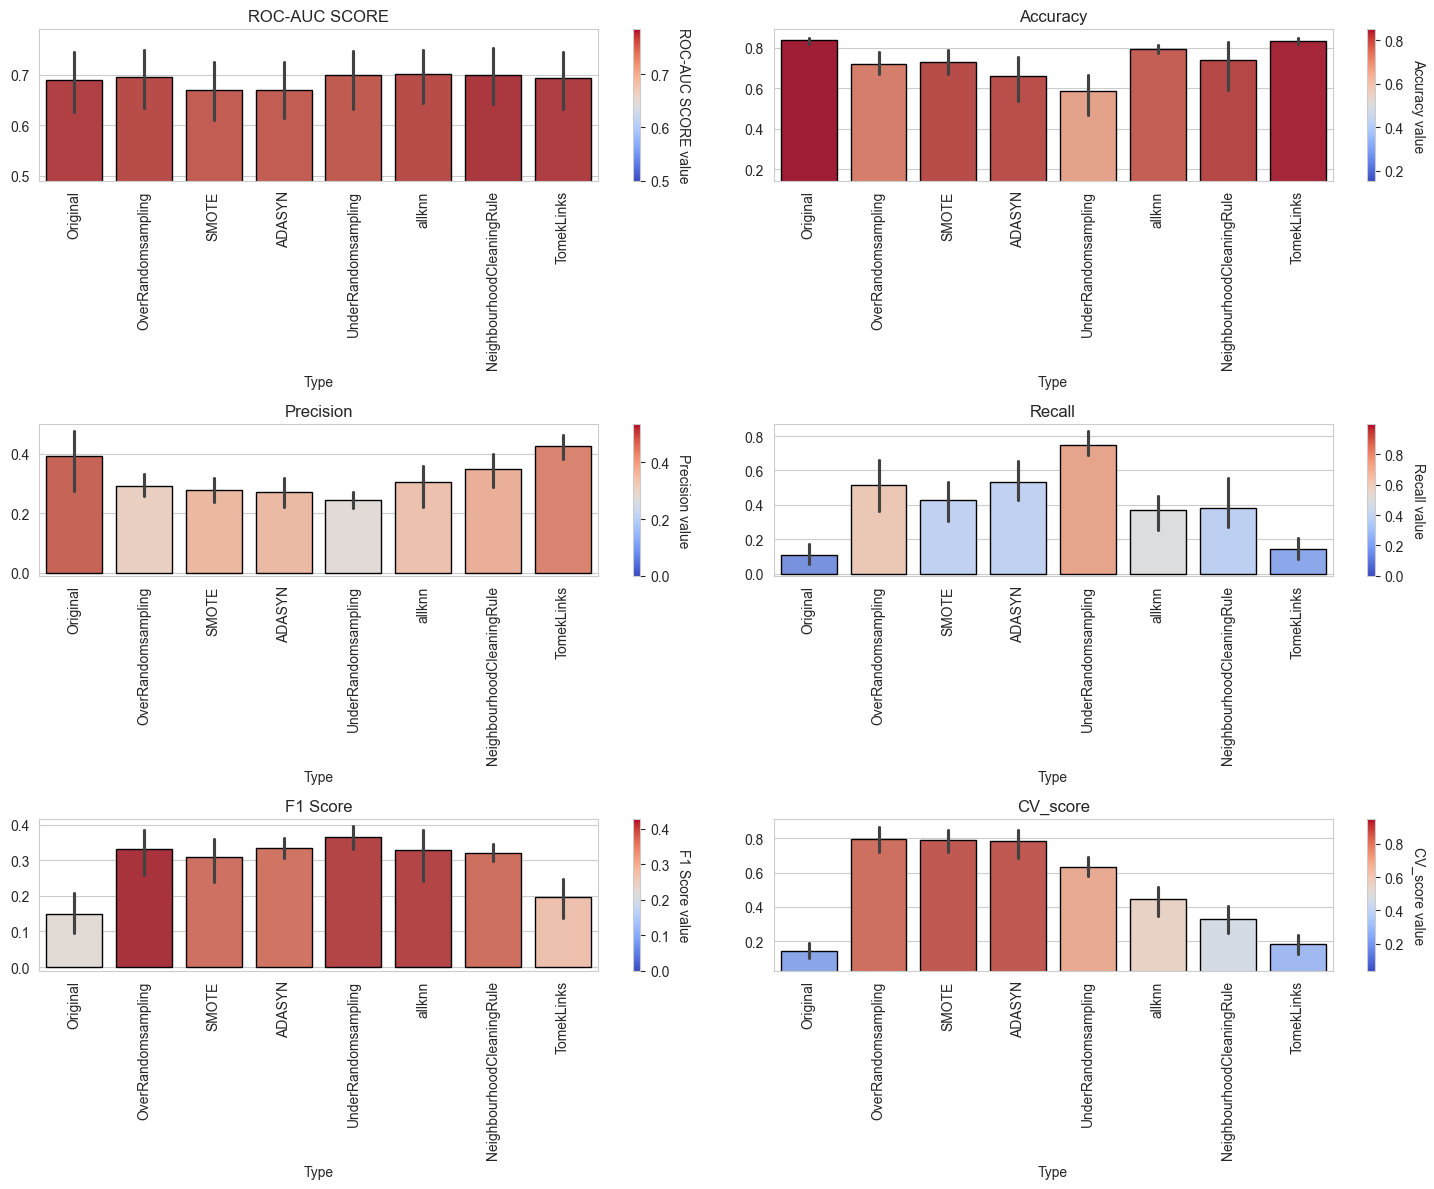

In [87]:
# Undersampling vs. Oversampling 
# Adjust figsize to accommodate all subplots (3 rows, 2 columns)
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 12), sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Dropping the unnecessary columns for plotting
features = SUMMARY.drop(["Technique", 'Algorithm', "Training time", "Type"], axis=1).columns

# Iterate over the axes and features to create the barplots with color gradient
for ax, feature in zip(axes, features):
    # Normalize the y-values to create a color gradient
    norm = plt.Normalize(SUMMARY[feature].min(), SUMMARY[feature].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])  # For color bar

    # Create barplot with color gradient
    colors = sm.to_rgba(SUMMARY[feature])
    sns.barplot(data=SUMMARY, x="Type", y=feature, ax=ax, edgecolor="k", palette=colors)
    
    ax.set_xticklabels(SUMMARY["Type"].unique(), rotation=90)
    ax.set_ylim(bottom = SUMMARY[feature].min() - 0.01)
    ax.set_title(f"{feature}")
    ax.set_ylabel("")
    
    # Add color bar for each feature
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(f"{feature} value", rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig("Undersampling_Oversampling_comp.png")
plt.show()


### Metrics comparation

In [209]:
from sklearn.preprocessing import MinMaxScaler 
# For Metrics comparasim need scale the Summary score.

temp = SUMMARY[['Technique', 'Type', 'ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]]

scaler = MinMaxScaler()
temp[['ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]] = scaler.fit_transform(temp[['ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]])

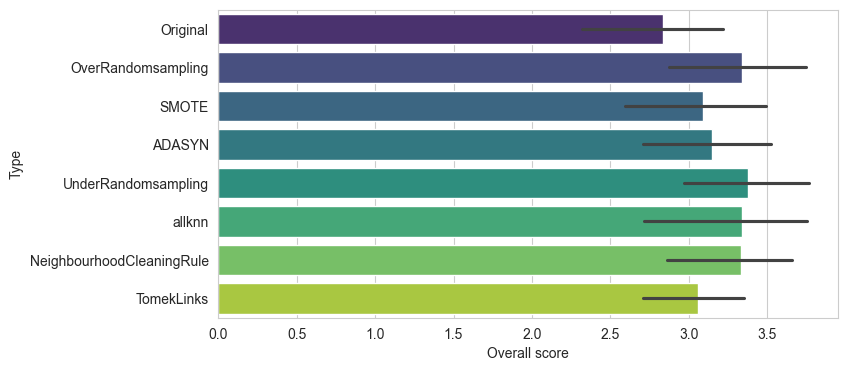

In [210]:
# Ploting overal score measured by adding other scores
temp["Overall score"] = temp[['ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score"]].sum(axis = 1)

plt.figure(figsize = (8, 4))
sns.barplot(data = temp, y = "Type", x = "Overall score", palette="viridis")
#plt.title("Sum of scaled metrics")
plt.show()

Instead of summing the metrics, we can use the harmonic mean of these scores (similar to how the F1 score is the harmonic mean of precision and recall). This can balance the contributions from each metric and ensure that a model with a poor score in any one metric is penalized.

In [211]:
## Ploting overal score measured by harmonic mean of other scores
# harmonic mean 
from scipy.stats import hmean
temp2 = SUMMARY[['Technique', 'Type', 'ROC-AUC SCORE', 'F1 Score', 'Precision', 'Recall', 'Accuracy', "CV_score"]]
# Avoid division by zero in case any metric has a value of zero
metrics = temp2[['ROC-AUC SCORE', 'F1 Score', 'Precision', 'Recall', 'Accuracy']].replace(0, 1e-10)
temp2['Overall score_HM'] = metrics.apply(hmean, axis=1)


In [212]:
temp2

,Technique,Type,ROC-AUC SCORE,F1 Score,Precision,Recall,Accuracy,CV_score,Overall score_HM
0,Original,Original,0.773539,0.224024,0.477987,0.146295,0.848030,0.220352,3.151907e-01
1,Over,OverRandomsampling,0.767315,0.415651,0.311688,0.623677,0.737047,0.827122,5.061957e-01
2,Over,SMOTE,0.758442,0.368997,0.364662,0.373436,0.808486,0.871128,4.679227e-01
3,Over,ADASYN,0.758288,0.366808,0.359519,0.374398,0.806177,0.870184,4.656427e-01
4,Under,UnderRandomsampling,0.759484,0.405812,0.279680,0.739172,0.675422,0.697667,4.906860e-01
...,...,...,...,...,...,...,...,...,...
67,Over,ADASYN,0.514807,0.264384,0.154129,0.928778,0.224996,0.465251,2.819421e-01
68,Under,UnderRandomsampling,0.501811,0.261461,0.150413,0.999038,0.153702,0.512614,2.503395e-01
69,Under,allknn,0.500000,0.000000,0.000000,0.000000,0.850051,0.208902,1.666667e-10
70,Under,NeighbourhoodCleaningRule,0.503084,0.261956,0.150741,0.999038,0.155867,0.080067,2.518157e-01


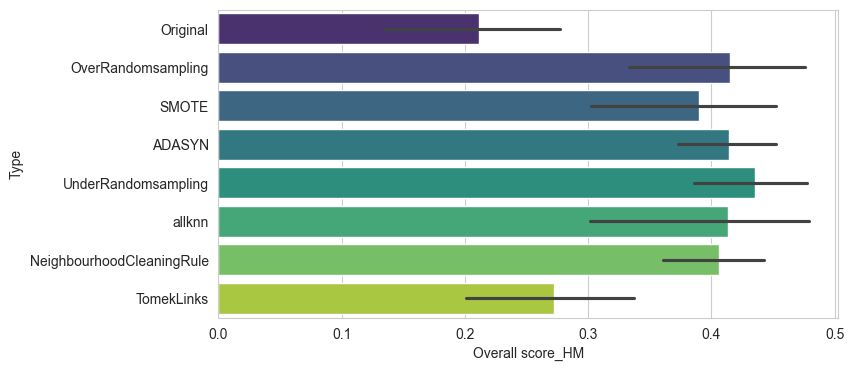

In [213]:
# Ploting overal score measured by harmenic mean
plt.figure(figsize = (8, 4))
sns.barplot(data = temp2, y = "Type", x = "Overall score_HM", palette="viridis")
#plt.title("Sum of scaled metrics")
plt.show()

### Techniques comparation

In [217]:
# For grouping with Type the mean of all score 
temp3 = temp2.drop('Technique', axis=1)
# visualization the heighest harmonic mean value
temp3.groupby("Type").mean().sort_values(by = "Overall score_HM", ascending = False).style.highlight_max(axis = 0, color = "red")

,ROC-AUC SCORE,F1 Score,Precision,Recall,Accuracy,CV_score,Overall score_HM
Type,,,,,,,
UnderRandomsampling,0.698297,0.364357,0.245242,0.746444,0.588605,0.635041,0.435687
OverRandomsampling,0.695375,0.332767,0.291384,0.514277,0.722808,0.793141,0.415125
ADASYN,0.669706,0.334702,0.271115,0.533419,0.660236,0.782106,0.414561
allknn,0.702035,0.329540,0.304442,0.369800,0.795738,0.444888,0.413623
NeighbourhoodCleaningRule,0.699592,0.321175,0.350033,0.383275,0.740992,0.330934,0.405830
SMOTE,0.669071,0.308919,0.277246,0.427013,0.731932,0.790675,0.389716
TomekLinks,0.693943,0.196013,0.426269,0.146936,0.836484,0.183014,0.271923
Original,0.689272,0.149514,0.391386,0.108438,0.838810,0.143826,0.211639


In [220]:
# For grouping with Type the mean of all score 
temp4 = temp.drop('Technique', axis=1)
# visualization the heighest mean value 
temp4.groupby("Type").mean().sort_values(by = "Overall score", ascending = False).style.highlight_max(axis = 0, color = "red")

,ROC-AUC SCORE,Accuracy,Precision,Recall,F1 Score,CV_score,Overall score
Type,,,,,,,
UnderRandomsampling,0.696390,0.623385,0.458497,0.747163,0.852905,0.656877,3.378340
allknn,0.709517,0.920287,0.569174,0.370156,0.771404,0.447275,3.340538
OverRandomsampling,0.686129,0.815750,0.544762,0.514772,0.778958,0.831148,3.340370
NeighbourhoodCleaningRule,0.700938,0.841815,0.654410,0.383644,0.751824,0.321666,3.332631
ADASYN,0.595983,0.726061,0.506868,0.533933,0.783487,0.818984,3.146331
SMOTE,0.593753,0.828828,0.518330,0.427425,0.723133,0.828429,3.091468
TomekLinks,0.681101,0.978693,0.796939,0.147078,0.458837,0.158616,3.062646
Original,0.664696,0.982025,0.731722,0.108542,0.349989,0.115420,2.836975


In [221]:
# Algorithom wise best result
temp5 = SUMMARY[['Algorithm', 'Type', 'ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]]

scaler = MinMaxScaler()
temp5[['ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]] = scaler.fit_transform(temp[['ROC-AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score", "CV_score"]])
metrics2 = temp5[['ROC-AUC SCORE', 'F1 Score', 'Precision', 'Recall', 'Accuracy']].replace(0, 1e-10)
temp5 = temp5.drop('Type', axis=1)
temp5['Overall score_HM'] = metrics.apply(hmean, axis=1)
# visualization the heighest harmonic mean value
temp5.groupby('Algorithm').mean().sort_values(by = "Overall score_HM", ascending = False).style.highlight_max(axis = 0, color = "red")

,ROC-AUC SCORE,Accuracy,Precision,Recall,F1 Score,CV_score,Overall score_HM
Algorithm,,,,,,,
XGB,0.937089,0.911409,0.691461,0.415222,0.830526,0.616624,0.449716
LGBM,0.971977,0.911641,0.729922,0.410525,0.784252,0.581248,0.424012
RandomForestClassifier,0.920662,0.939439,0.750833,0.336826,0.763102,0.611182,0.420950
LogisticRegression,0.875277,0.874793,0.646970,0.433165,0.739847,0.493367,0.400058
DecisionTreeClassifier,0.354652,0.840556,0.500541,0.402095,0.734860,0.608705,0.397111
knn,0.544560,0.814750,0.536406,0.430034,0.727788,0.540953,0.396480
svc,0.706591,0.867941,0.657893,0.389812,0.668094,0.473300,0.364813
GaussianNB,0.663857,0.763059,0.547470,0.440992,0.626709,0.471381,0.344391
SGDClassifier,0.019906,0.632861,0.316792,0.378131,0.279175,0.303956,0.130337


### Creating ROC curve

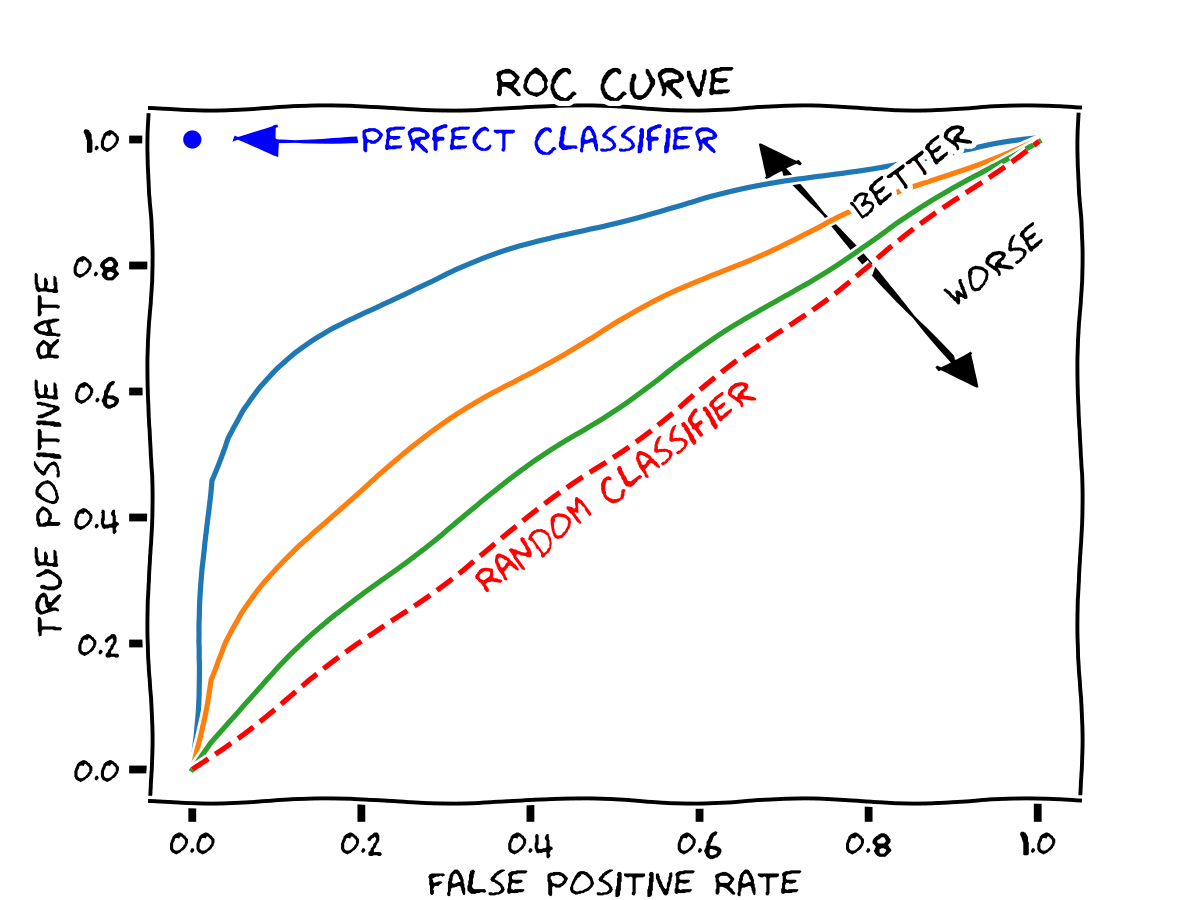

In [110]:
#plot_roc_auc_curves for all model
def plot_roc_auc_curves(models, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        
        # If the model has predict_proba, use it; otherwise, use decision_function
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        
        # Compute ROC curve and AUC score
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC-AUC Curves for Classification Algorithms')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
sampling_type


In [111]:
sampling_type

,Technique,Type,X_train_name,Y_train_name
0,Original,Original,X_train,Y_train
1,Over,OverRandomsampling,X_over,y_over
2,Over,SMOTE,X_train_sm,Y_train_sm
3,Over,ADASYN,X_ada,y_ada
4,Under,UnderRandomsampling,X_under,y_under
5,Under,allknn,X_allknn,y_allknn
6,Under,NeighbourhoodCleaningRule,X_ncr,y_ncr
7,Under,TomekLinks,X_tl,y_tl


In [112]:
# make  ROC curve for OverRandomsampling Type
# Select sample X_over, y_over
print("Scaling...")
x_train_, x_test_, x_val_ = scale_data(X_over,X_test, X_val)
y_train = y_over

Scaling...


[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


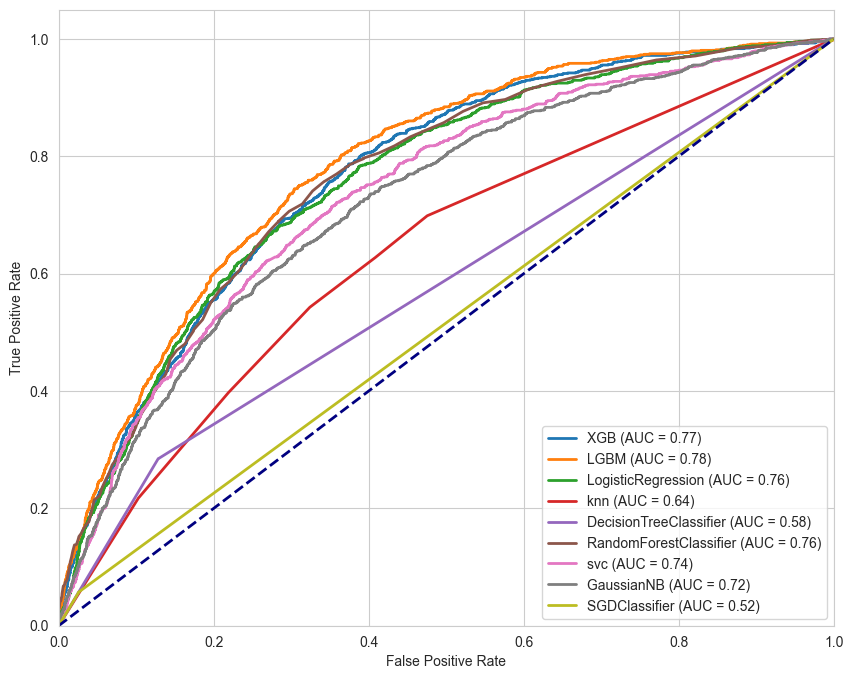

In [113]:
# Plot ROC-AUC curves before gride search
plot_roc_auc_curves(models, x_train_, y_train,  x_test_, Y_test)

## Confusion matrix

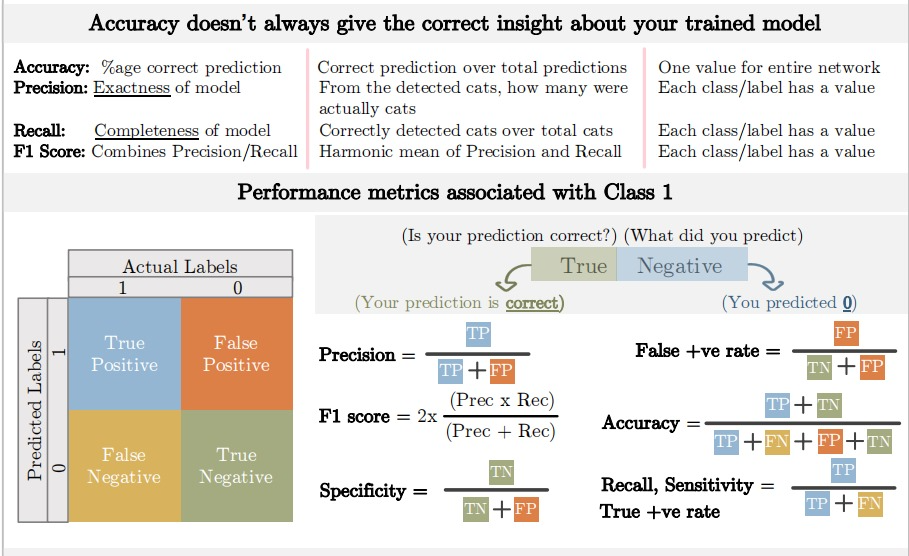

In [ ]:
# Making confusion matrix on test set

for i in tqdm(range(len(sampling_type))):
  for name, estimetor in models.items():
    
    # "Scaling... the resampled X_tarin and original X_test
    x_train_, x_test_, x_val_ = scale_data(globals()[sampling_type.X_train_name[i]], X_test, X_val) 
    
    #to generate cross-validated predictions
    # y_pred_cross_val = cross_val_predict(esimetor, X_train, y_train, cv=5)
    Y_pre = cross_val_predict(estimetor, x_train_, globals()[sampling_type.Y_train_name[i]], cv=5)  #cross validation/iterable (cv) is 5
    
    # multilabel_confusion_matrix(y_train, y_pred_cross_val)
    confusion_matrix = classification_report( globals()[sampling_type.Y_train_name[i]],Y_pre)
    
    # Print test set confusion matrix
    print(f"Multilabel Confusion Matrix with {name} for {sampling_type.Type[i]} Train Set: \n {confusion_matrix} \n" )
   

In [ ]:
# Making confusion matrix
for i in tqdm(range(len(sampling_type))):
  for name, estimetor in models.items():
     
    # "Scaling... the resampled X_tarin and original X_test
    x_train_, x_test_, x_val_ = scale_data(globals()[sampling_type.X_train_name[i]], X_test, X_val) 
    
    # model.fit(X_train, y_train)
    fit_model = train_model(x_train_, globals()[sampling_type.Y_train_name[i]], estimetor) # add algorithm , 
    
    # Predict on the test set
    y_pred_test = fit_model.predict(x_test_)
    
    # classification_report(y_test, y_pred_on test)
    confusion_matrix = classification_report(Y_test, y_pred_test)
    
    # Print test set confusion matrix
    print(f"Multilabel Confusion Matrix with {name} for {sampling_type.Type[i]} Test Set: \n {confusion_matrix} \n" )

   
    
  

## Grid search

We can use grid search to search the optimal weight values for our model training

In [ ]:

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'XGBClassifier': {
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    },
    'LGBMClassifier': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [-1, 3, 5],
            'learning_rate': [0.01, 0.1] # type: ignore
        }
    },
        
        'logistic_regression' : {
            'model': LogisticRegression( max_iter=1000),
            'params': {
                'solver' : ['newton-cholesky','newton-cg','liblinear', 'lbfgs','sag'],
                'C': [0.01, 0.1, 1.0, 10, 100], # type: ignore
                'penalty': ['none', 'l2'],
                }
            },
        'KNeighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
                }
            },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                }
            },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'max_features' : ['sqrt', 'log2']
                }
            },
        
        'GNB': {
            'model': GaussianNB(),
            'params': {
                
                }
            },

        'SVM': {
            'model': SVC( ),
            'params': {
                'C': [0.1, 1.0, 10.0,50.0],
                'kernel': ['linear', 'rbf','sigmoid'],
                'gamma':['auto','scale']
                
                }
            },

        'SGD': {
            'model': SGDClassifier(loss='modified_huber', random_state=42),
            'params': {
                'alpha': [0.0001, 0.001, 0.01],
                'penalty': ['l1', 'l2', 'elasticnet']
                }
            }
    }
    scores = []
    cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=28)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv,scoring='f1', return_train_score=True)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [ ]:
# Find the best model
find_best_model_using_gridsearchcv(X_allknn,y_allknn)

# Model fitting and evaluation

In [116]:
# for ML model with best paremeter from grid search
def get_models():
  models = dict()
  models['XGB'] = XGBClassifier(learning_rate= 0.1, max_depth= 7)
  models['LGBM'] = LGBMClassifier(learning_rate= 0.1, max_depth= -1)
  models['LogisticRegression'] = LogisticRegression(solver='newton-cg', max_iter=1000, C= 100, penalty= 'l2') #Assigning Class Weights for imbalance classicication
  models['knn'] = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3)
  models['DecisionTreeClassifier']= DecisionTreeClassifier( max_depth= 10, min_samples_split= 2)
  models['RandomForestClassifier'] = RandomForestClassifier(max_depth= None, max_features= 'sqrt')
  models['svc'] = SVC(gamma='auto', probability=True,kernel='rbf', C=10.0, )
  models['GaussianNB'] = GaussianNB()
  models['SGDClassifier'] = SGDClassifier(loss='modified_huber', random_state=42, alpha= 0.01, penalty= 'l1')

  return models

[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


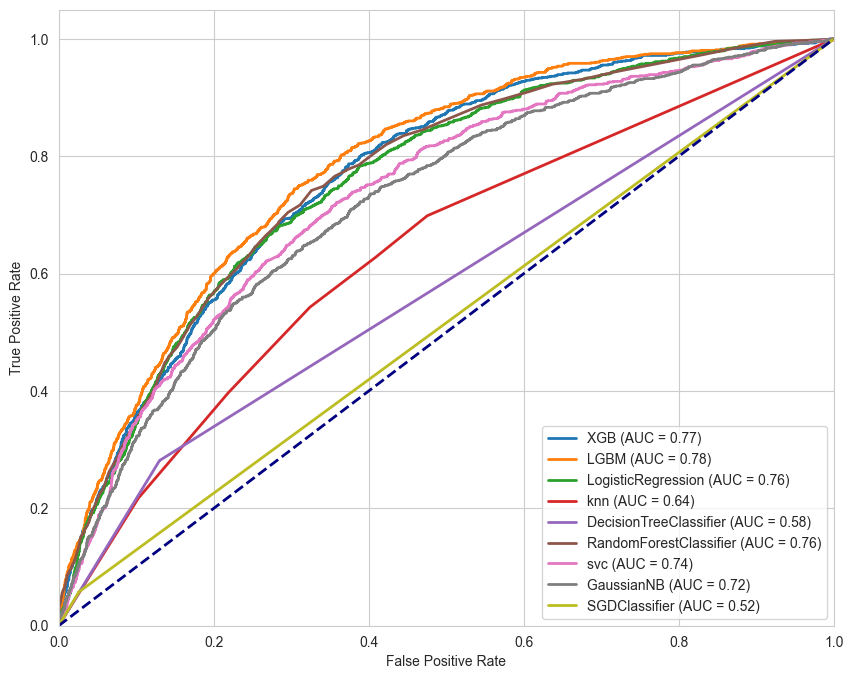

In [117]:
# Fianl Plot ROC-AUC curves after Grid search
plot_roc_auc_curves(models, x_train_, y_train,  x_test_, Y_test)


In [127]:
models.items()

dict_items([('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('LGBM', LGBMClassifier()), ('LogisticRegression', LogisticRegression(max_iter=1000, solver='newton-cholesky')), ('knn', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('RandomForestClassi

##  Confusion matrix

In [160]:
# Making confusion matrix
def confusion_matrix_cal(name, models, X_train, y_train, X_test, y_test):
        
    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(X_train,X_test, X_val)

        
    # model.fit(X_train, y_train)
    fit_model = train_model(x_train_,  y_train, models) # add algorithm , 

    # Predict on the test set
    y_pred_test = fit_model.predict(x_test_)

    # classification_report(y_test, y_pred_on test)
    confusion_matrix = classification_report(y_test, y_pred_test)

    # Print test set confusion matrix
    print(f"Multilabel Confusion Matrix with {name} Test Set: \n {confusion_matrix} \n" )

    


In [161]:
# onfusion_matrix for final model
# Select the final model 
# sample X_over, y_over
# models['LGBM']

model_items = list(models.items())
#  'LGBM' index is i
ML_model_name, ML_model = model_items[1]
confusion_matrix_cal(ML_model_name, ML_model,X_over, y_over, X_test, Y_test)

Scaling...
[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Multilabel Confusion Matrix with LGBM Test Set: 
               precision    recall  f1-score   support

           0       0.94      0.69      0.80      5890
           1       0.30      0.75      0.43      1039

    accuracy                           0.70      6929
   macro avg       0.62      0.72      0.61      6929
weighted avg       0.84      0.70      0.74      6929
 



In [224]:
# onfusion_matrix for final model
# Select the final model 
# sample X_under , y_under
# models['XGB']

model_items = list(models.items())
#  ' XGB ' index is 0
ML_model_name, ML_model = model_items[0]
confusion_matrix_cal(ML_model_name, ML_model,X_under , y_under, X_test, Y_test)

Scaling...
Multilabel Confusion Matrix with XGB Test Set: 
               precision    recall  f1-score   support

           0       0.94      0.66      0.78      5890
           1       0.28      0.74      0.41      1039

    accuracy                           0.68      6929
   macro avg       0.61      0.70      0.59      6929
weighted avg       0.84      0.68      0.72      6929
 



## ROC-AUC curves

In [244]:
# build ROC_curve for single model
def ROC_curve_only(X_train, y_train, ML_model_name, ML_model):
    plt.figure(figsize=(10, 8))
    # make  ROC curve for OverRandomsampling Type
    # Select sample X_over, y_over
    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(X_train,X_test, X_val)
    # y_over as Y_train

    ML_model.fit(x_train_,  y_train)

    # If the model has predict_proba, use it; otherwise, use decision_function
    if hasattr(ML_model, "predict_proba"):
        y_proba = ML_model.predict_proba(x_test_)[:, 1]
    else:
        y_proba = ML_model.decision_function(x_test_)

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{ML_model_name} (AUC = {roc_auc:.2f})')

    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC-AUC Curves for Classification Algorithms')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig("ROC-AUC Curves for LGBMClassifier Algorithms.png")
    plt.show()

'RandomForestClassifier'

Scaling...


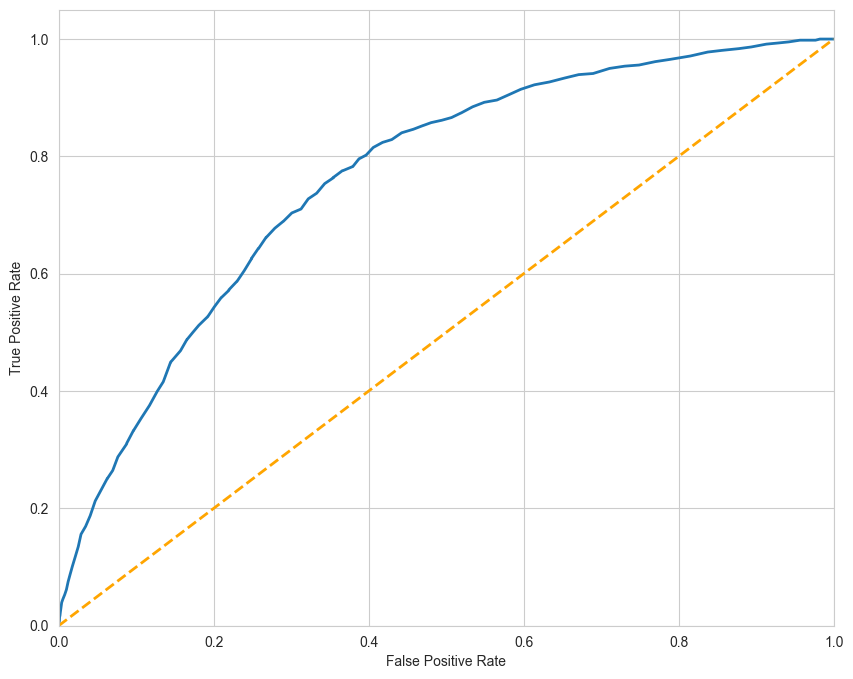

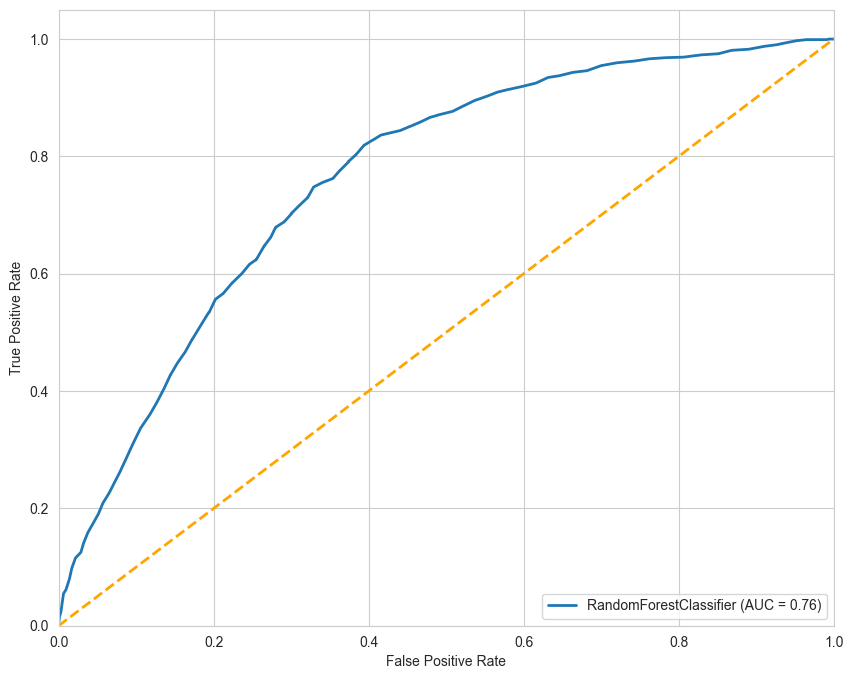

In [245]:
# Select the final model 
# sample X_under , y_under
# models['RandomForestClassifier']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[5]
ROC_curve_only(X_under , y_under, ML_model_name, ML_model)

Scaling...


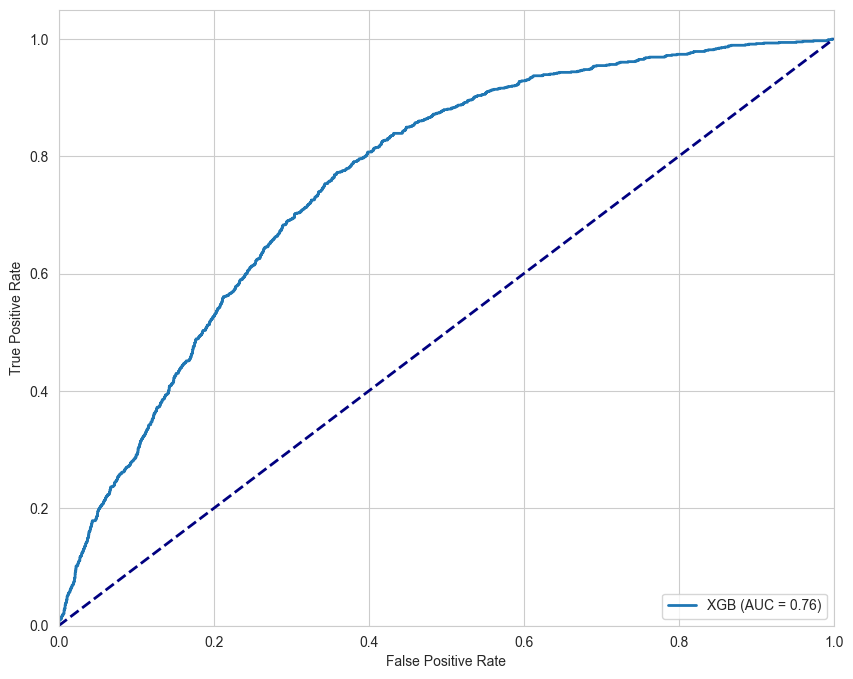

In [229]:
# Select the final model 
# sample X_under , y_under
# models['XGB']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[0]
ROC_curve_only(X_under , y_under, ML_model_name, ML_model)


Scaling...
[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


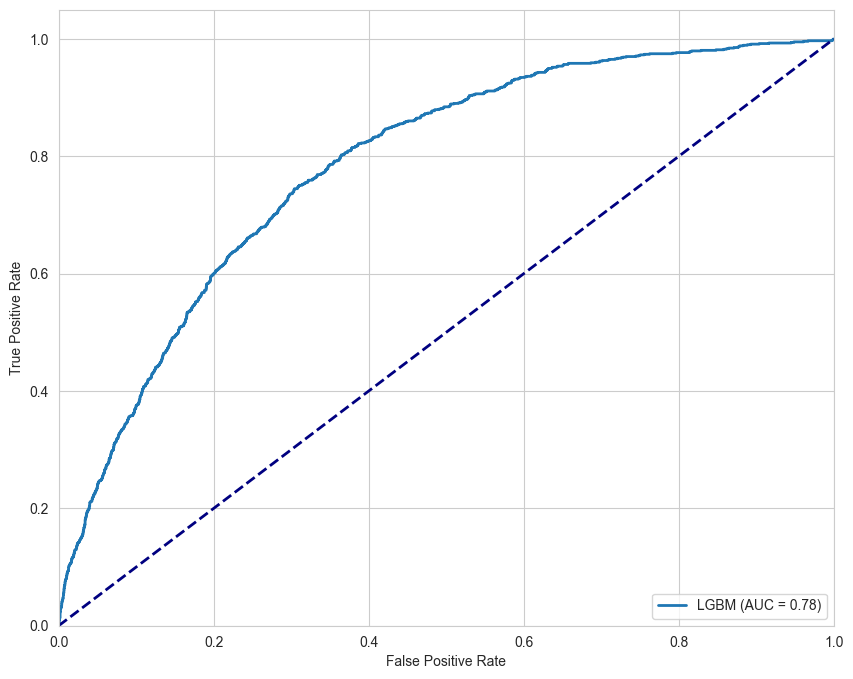

In [230]:
# onfusion_matrix for final model
# Select the final model 
# sample X_over, y_over
# models['LGBM']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[1]
ROC_curve_only(X_over , y_over, ML_model_name, ML_model)

In [236]:
#Precision-Recall curve function for any model
def Precision_Recall_curve_only (X_train, y_train, ML_model_name, ML_model):
    fig = plt.figure(figsize=(12,6))

    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(X_over,X_test, X_val)
    # y_over as Y_train
    # Train the model
    ML_model.fit(x_train_,  y_over)
    # Predict probabilities for the test set
    y_proba = ML_model.predict_proba(x_test_)[:, 1]

    average_precision = average_precision_score(Y_test , y_proba)
    precision, recall, _ = precision_recall_curve(Y_test , y_proba )

    plt.step(recall, precision, color='r', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='#F59B00')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
            #average_precision), fontsize=16)
    plt.show()
    print(f"average_precision of {ML_model_name} is",average_precision )

Scaling...
[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


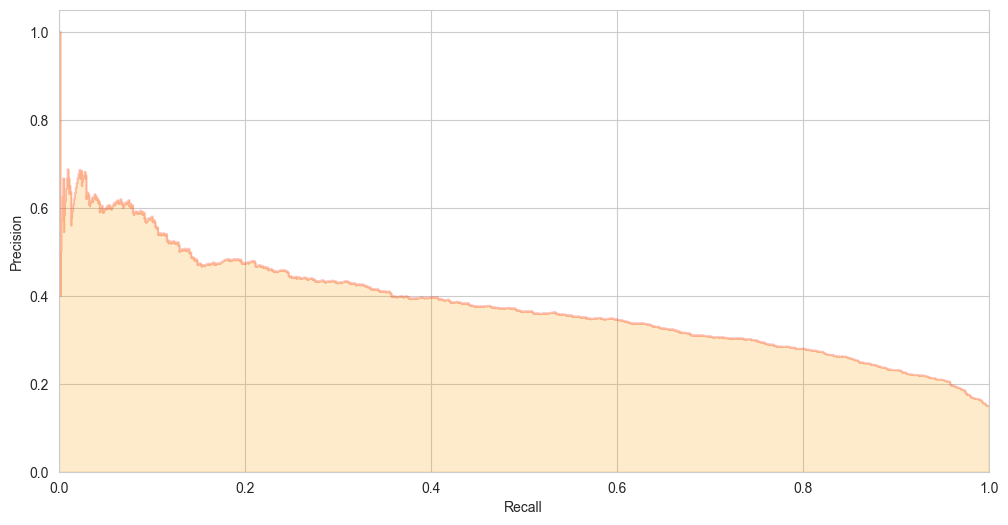

average_precision of LGBM is 0.3791835247272273


In [237]:
# onfusion_matrix for final model
# Select the final model 
# sample X_over, y_over
# models['LGBM']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[1]
Precision_Recall_curve_only(X_over , y_over, ML_model_name, ML_model)

Scaling...


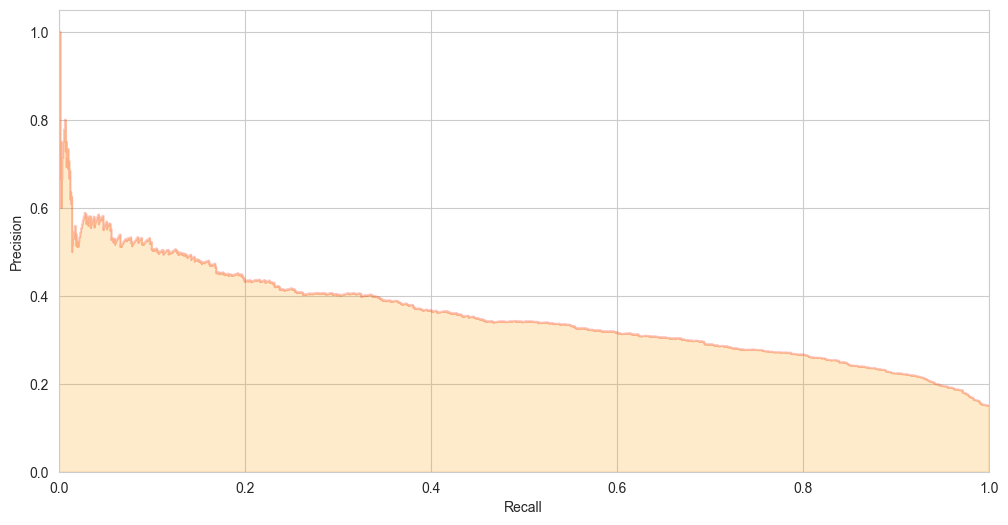

average_precision of XGB is 0.3560397139871978


In [238]:
# Select the final model 
# sample X_under , y_under
# models['XGB']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[0]
Precision_Recall_curve_only(X_under , y_under, ML_model_name, ML_model)

Scaling...


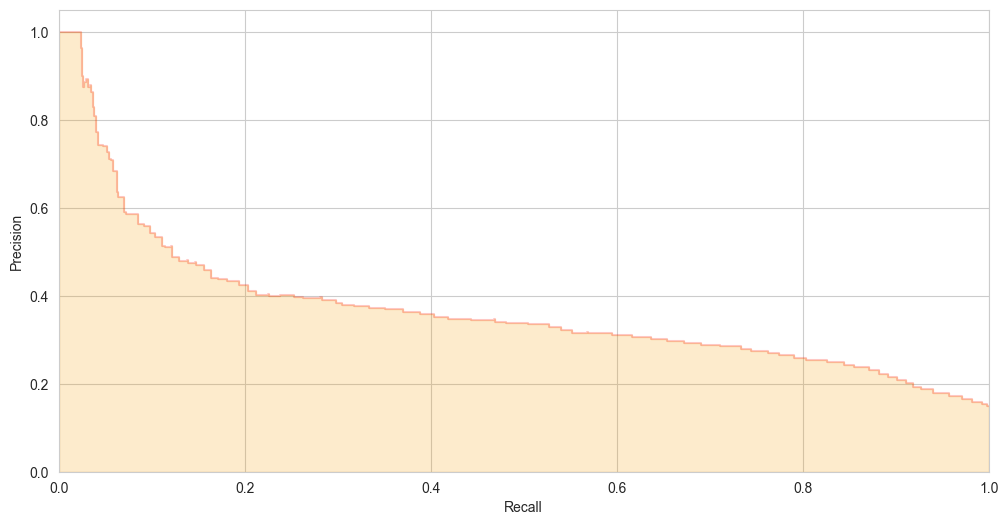

average_precision of RandomForestClassifier is 0.3668076145871069


In [239]:
# Select the final model 
# sample X_under , y_under
# models['RandomForestClassifier']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[5]
Precision_Recall_curve_only(X_under , y_under, ML_model_name, ML_model)

# Check for Unseen data

In [262]:
def Val_Perfm(ML_model,x_train , y_train):
    fitted_model = ML_model.fit(x_train , y_train)
    x_train_, x_test_, x_val_ = scale_data(x_train,X_test, X_val)
    # Step 1: Predict the labels or probabilities for the validation set
    y_val_pred = fitted_model.predict(x_val_)
    y_val_prob = fitted_model.predict_proba(x_val_)[:, 1]  # If you need probabilities for metrics like ROC-AUC


    # Step 2: Evaluate the performance
    accuracy = accuracy_score(Y_val, y_val_pred)
    precision = precision_score(Y_val, y_val_pred)
    recall = recall_score(Y_val, y_val_pred)
    f1 = f1_score(Y_val, y_val_pred)
    roc_auc = roc_auc_score(Y_val, y_val_prob)  # Use predicted probabilities for ROC-AUC

    # Print evaluation metrics
    print(f"Use: {ML_model_name}")
    print("Validation Set Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    # Classification report for detailed evaluation
    print("\nClassification Report:")
    print(classification_report(Y_val, y_val_pred))
    #Precision_Recall_curve_only(X_under , y_under, ML_model_name, ML_model)
    #ROC_curve_only(X_over , y_over, ML_model_name, ML_model)

In [263]:
# Select the final model 
# sample X_under , y_under
# models['XGB']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[0]
fitted_model = ML_model.fit(X_under , y_under)

# validetion set evaluation

Val_Perfm(ML_model,X_under , y_under)

Use: XGB
Validation Set Performance:
Accuracy: 0.56
Precision: 0.22
Recall: 0.78
F1 Score: 0.35
ROC-AUC Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67      5890
           1       0.22      0.78      0.35      1039

    accuracy                           0.56      6929
   macro avg       0.58      0.65      0.51      6929
weighted avg       0.82      0.56      0.62      6929



In [264]:
# Select the final model 
# sample X_under , y_under
# models['RandomForestClassifier']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[5]
# validetion set evaluation

Val_Perfm(ML_model,X_under , y_under)

Use: RandomForestClassifier
Validation Set Performance:
Accuracy: 0.42
Precision: 0.18
Recall: 0.79
F1 Score: 0.29
ROC-AUC Score: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.36      0.52      5890
           1       0.18      0.79      0.29      1039

    accuracy                           0.42      6929
   macro avg       0.54      0.57      0.40      6929
weighted avg       0.80      0.42      0.48      6929



In [265]:
# onfusion_matrix for final model
# Select the final model 
# sample X_over, y_over
# models['LGBM']

model_items = list(models.items())
#  XGB index is 0
ML_model_name, ML_model = model_items[1]
# validetion set evaluation

Val_Perfm(ML_model,X_over, y_over)

[LightGBM] [Info] Number of positive: 27486, number of negative: 27486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 54972, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Use: LGBM
Validation Set Performance:
Accuracy: 0.61
Precision: 0.24
Recall: 0.74
F1 Score: 0.36
ROC-AUC Score: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      5890
           1       0.24      0.74      0.36      1039

    accuracy                           0.61      6929
   macro avg       0.58      0.66      0.54      6929
weighted avg       0.82      0.61      0.67      6929



In [283]:
#plot_roc_auc_curves for all model
def plot_roc_auc_curves_Val(models, x_train, y_train):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        
        #Scaling...
        x_train_, x_test_, x_val_ = scale_data(x_train,X_test, X_val)
        # Fit model
        model.fit(x_train_, y_train)
        
        # If the model has predict_proba, use it; otherwise, use decision_function
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(x_val_)[:, 1]
        else:
            y_proba = model.decision_function(x_val_)
        
        # Compute ROC curve and AUC score
        fpr, tpr, _ = roc_curve(Y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC-AUC Curves for validetion set')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [271]:
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LGBM': LGBMClassifier(),
 'LogisticRegression': LogisticRegression(max_iter=1000, solver='newton-cholesky'),
 'knn': KNeighborsClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': 

[LightGBM] [Info] Number of positive: 4849, number of negative: 4849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 9698, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


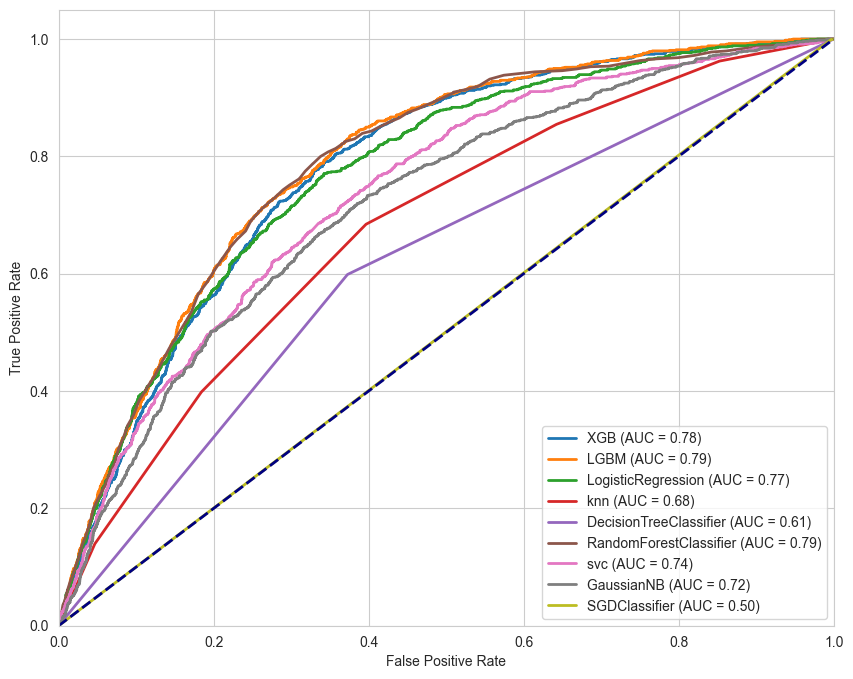

In [282]:
#  roc_auc_curves for validetion set

plot_roc_auc_curves_Val(models, X_under, y_under)